<a href="https://colab.research.google.com/github/PranavReddyy/MLProject/blob/main/p2_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering techniques evaluation

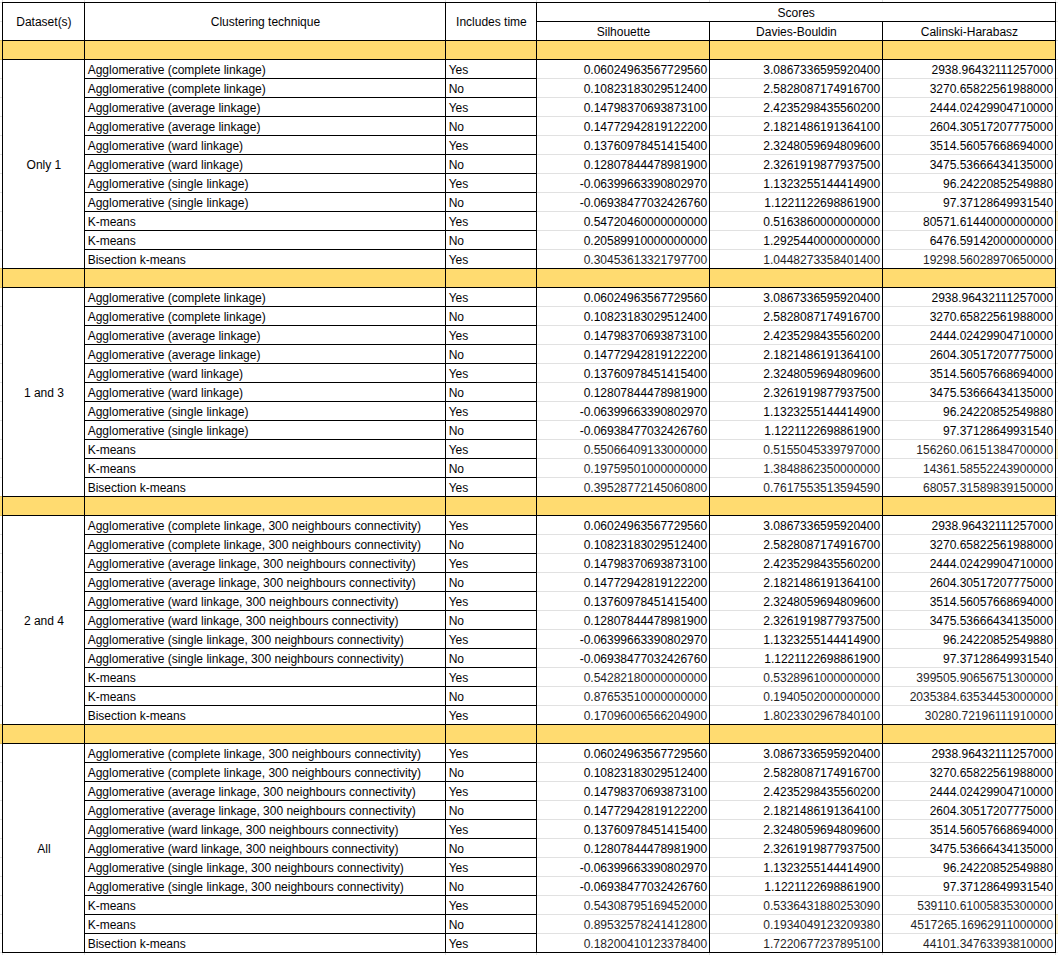

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1_cluster_T = pd.read_pickle('/content/drive/MyDrive/mlproject/df_cluster_T.pkl')
df13_cluster_T = pd.read_pickle('/content/drive/MyDrive/mlproject/df13_cluster_T.pkl')
df24_cluster_T = pd.read_pickle('/content/drive/MyDrive/mlproject/df24_cluster_T.pkl')
df_all_cluster_T = pd.read_pickle('/content/drive/MyDrive/mlproject/df_all_cluster_T.pkl')

## *DATA SET 1*

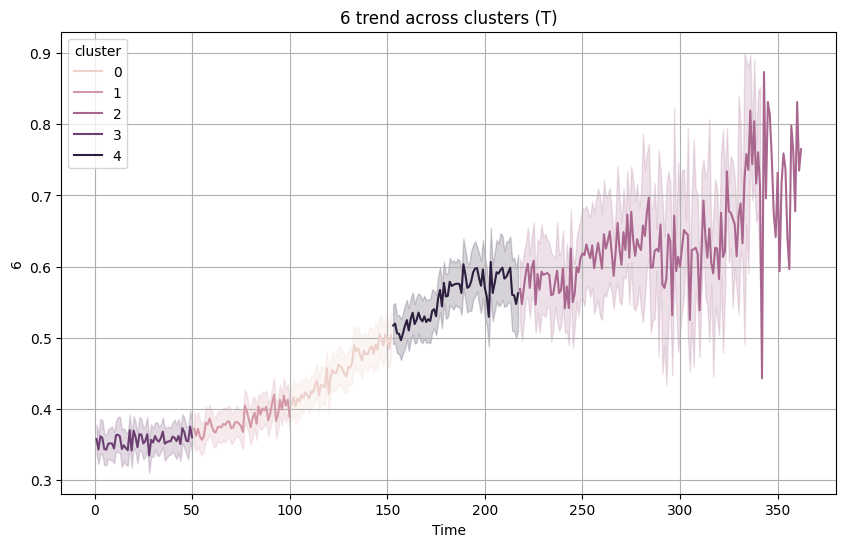

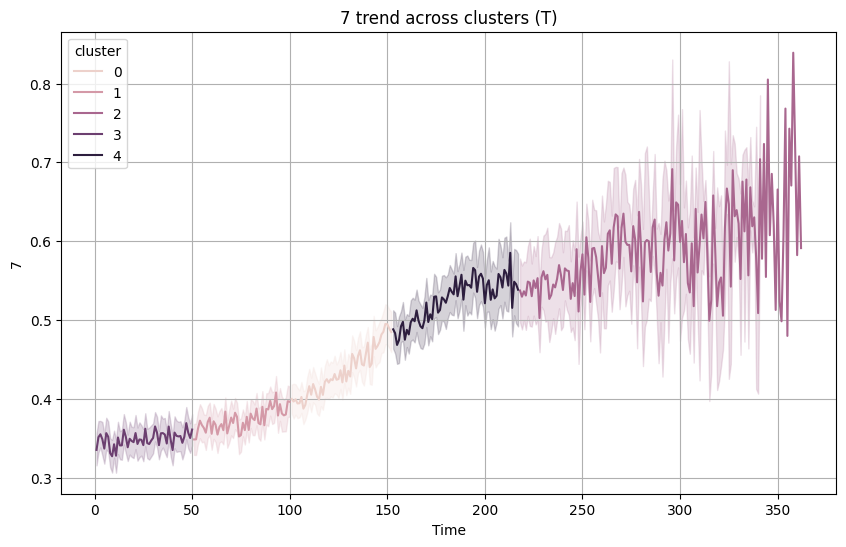

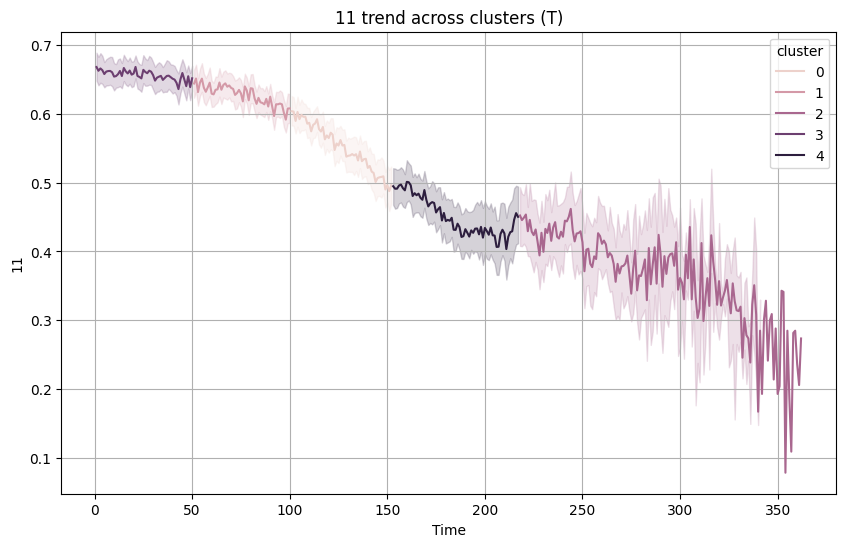

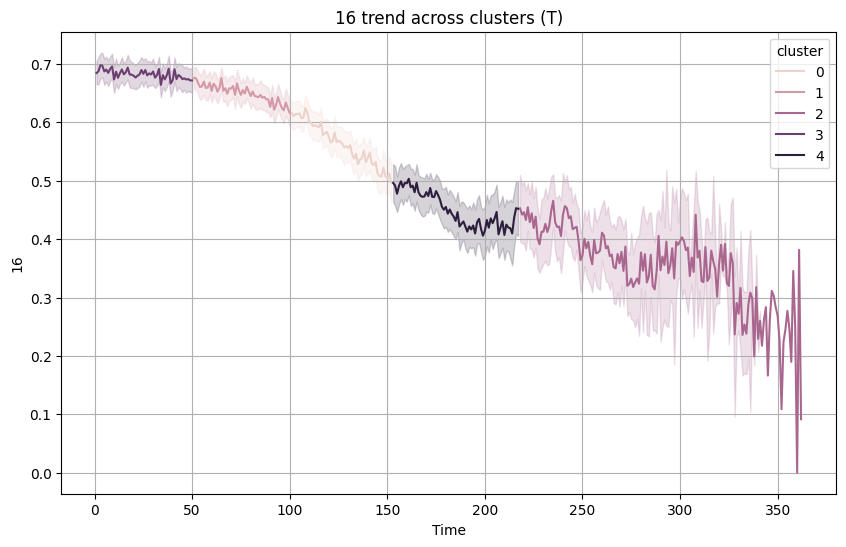

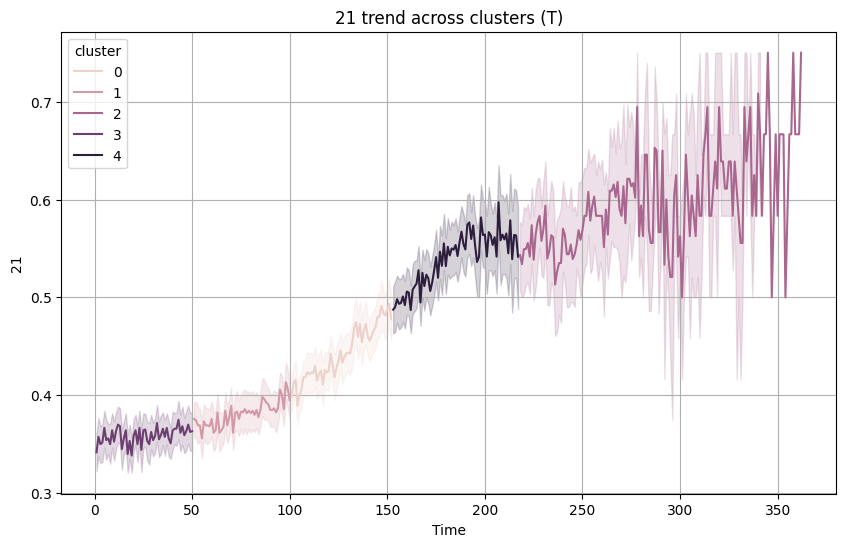

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  #it takes all the points from cluster "k", finds the mean value of sensor "s" at time "t" and maps it. it does this for all t values in cluster
  #the translucent region is the confidence interval for mean
  sns.lineplot(data=df1_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0      2
    1      1
    2      4
    3      0
    4      3
  '''

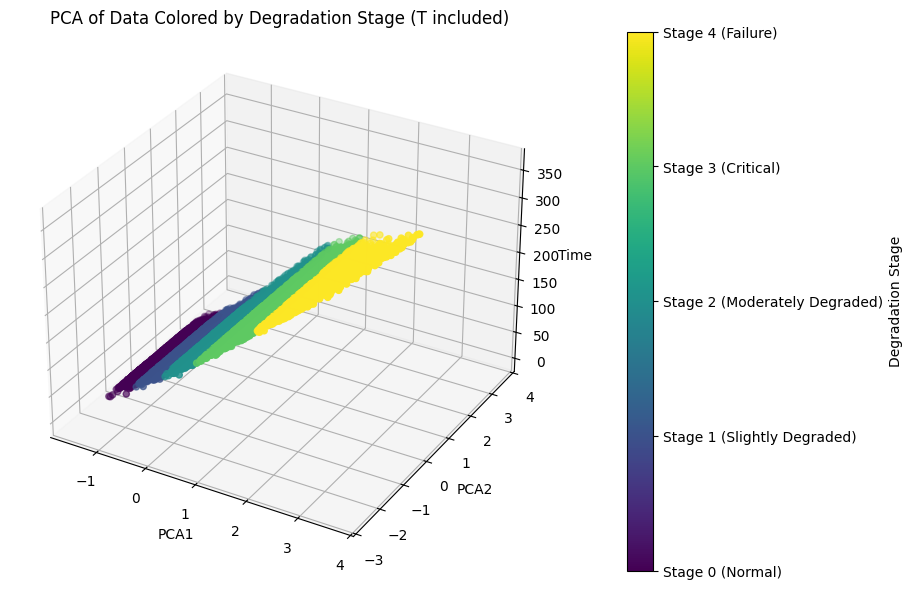

In [ ]:
sensor_cols_T = [col for col in df1_cluster_T.columns if col not in [0,'cluster']]
X_T = df1_cluster_T[sensor_cols_T].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T = pcat.fit_transform(X_T)


df1_pca_T= df1_cluster_T.copy()
df1_pca_T['PCA1'] = X_pca_T[:, 0]
df1_pca_T['PCA2'] = X_pca_T[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 2,
    1: 1,
    2: 4,
    3: 0,
    4: 3
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df1_pca_T['stage'] = df1_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df1_plot_T = df1_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df1_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df1_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df1_plot_T['PCA1'], df1_plot_T['PCA2'], df1_plot_T[1], c=df1_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()

## *DATA SET 1 AND 3*

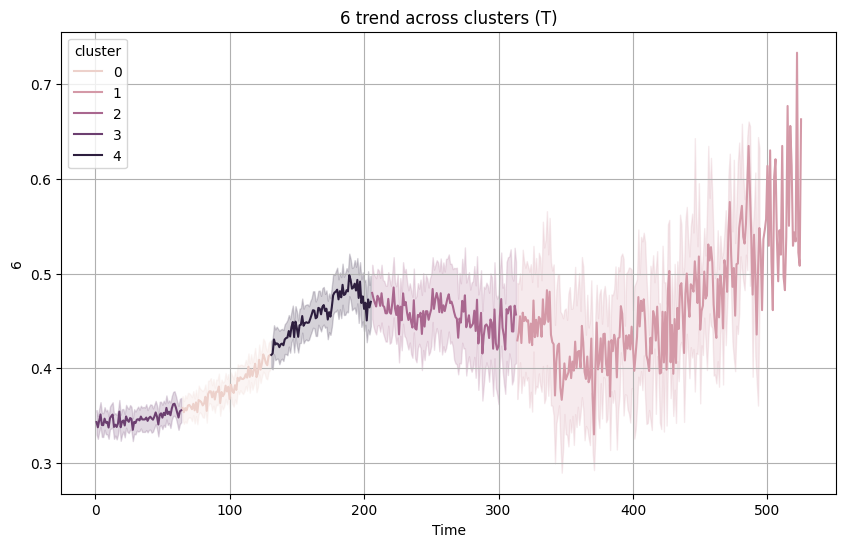

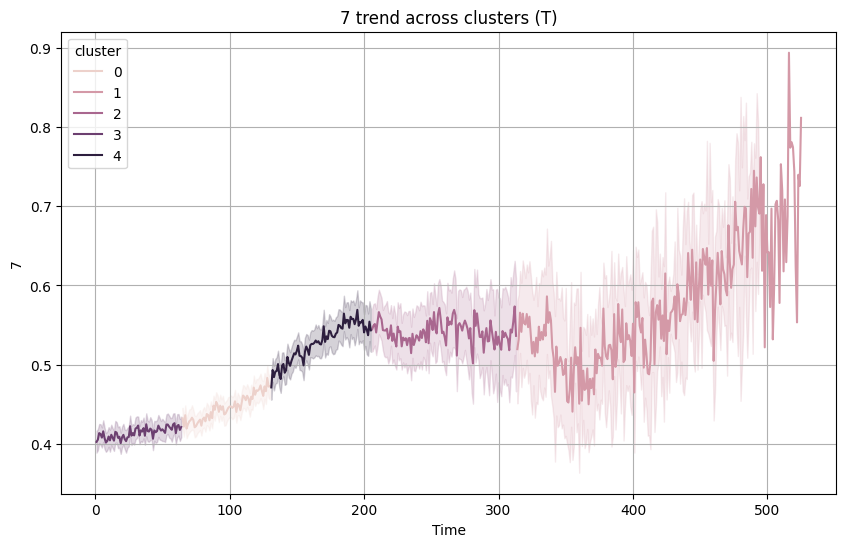

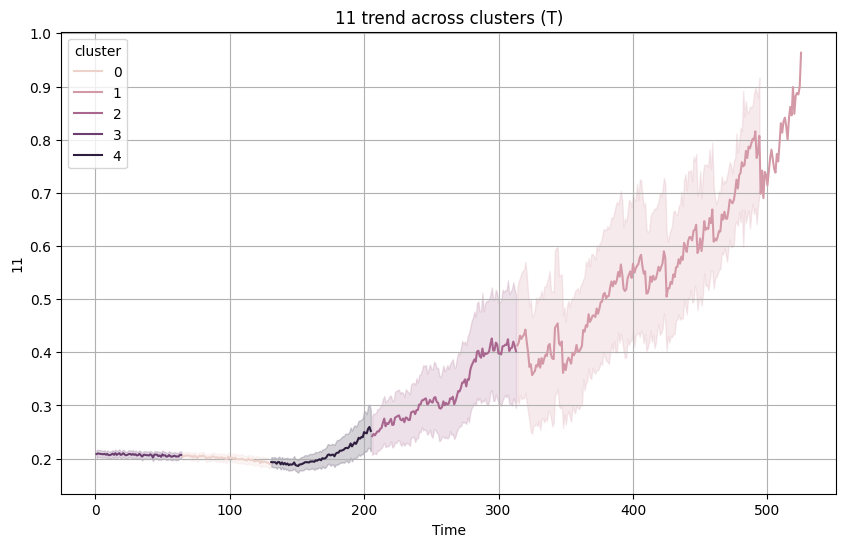

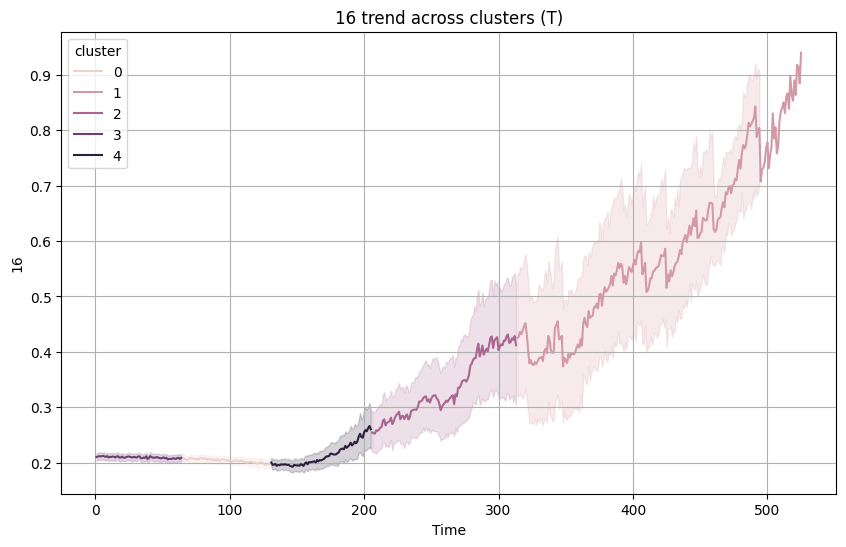

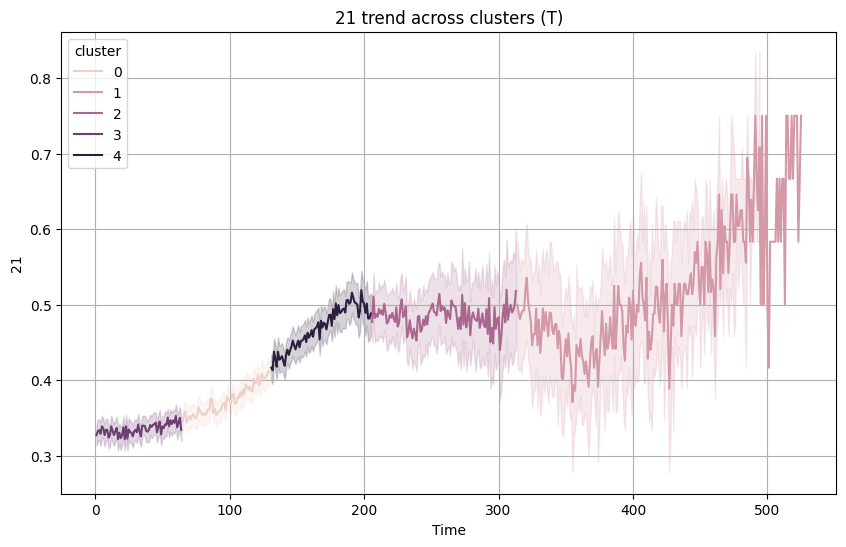

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df13_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0     1
    1     4
    2     3
    3     0
    4     2
  '''

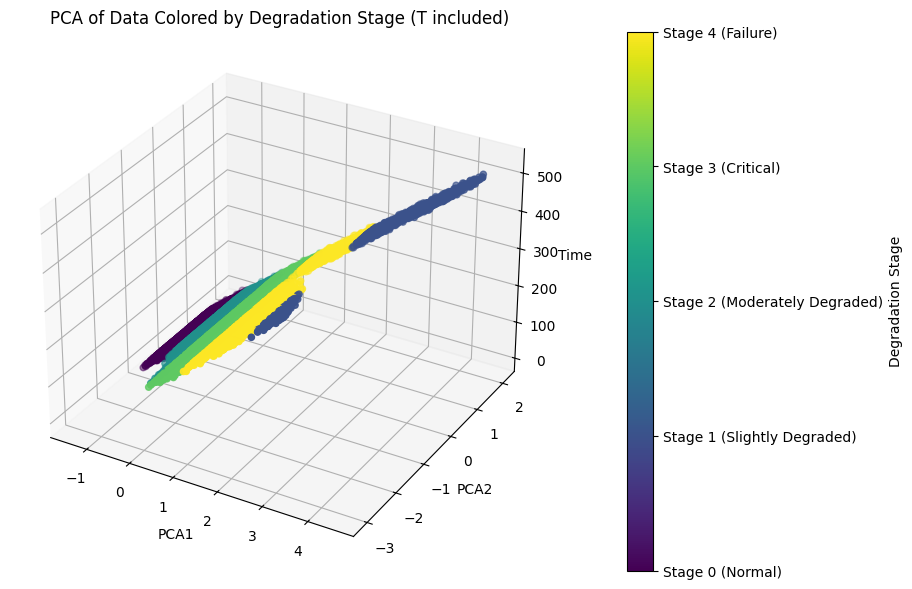

In [ ]:
sensor_cols_T13 = [col for col in df13_cluster_T.columns if col not in [0,'cluster']]
X_T13 = df13_cluster_T[sensor_cols_T13].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T13 = pcat.fit_transform(X_T13)


df13_pca_T= df13_cluster_T.copy()
df13_pca_T['PCA1'] = X_pca_T13[:, 0]
df13_pca_T['PCA2'] = X_pca_T13[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 2,
    1: 1,
    2: 4,
    3: 0,
    4: 3
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df13_pca_T['stage'] = df13_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df13_plot_T = df13_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df13_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df13_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df13_plot_T['PCA1'], df13_plot_T['PCA2'], df13_plot_T[1], c=df13_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()

## *DATASETS 2 AND 4*

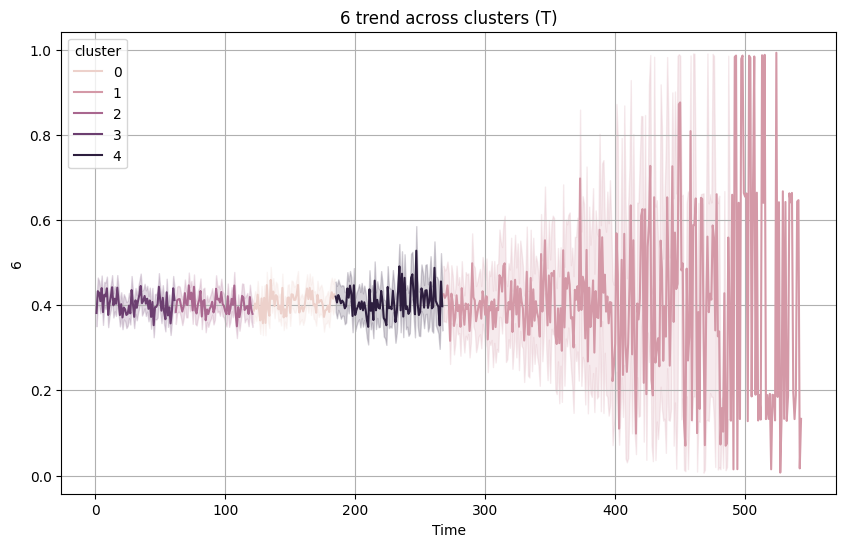

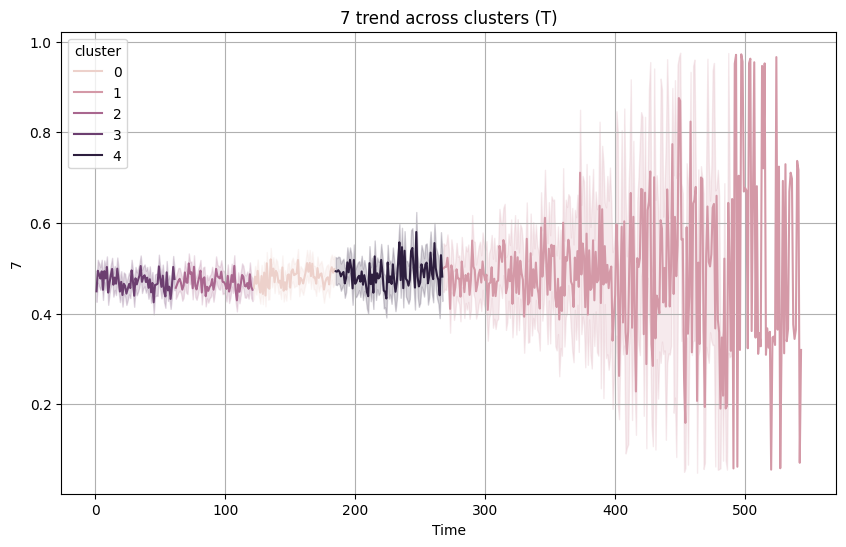

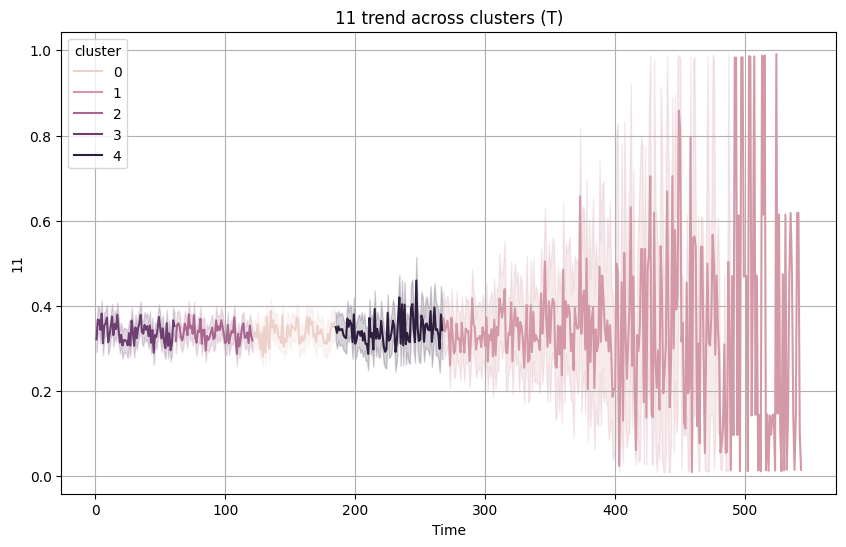

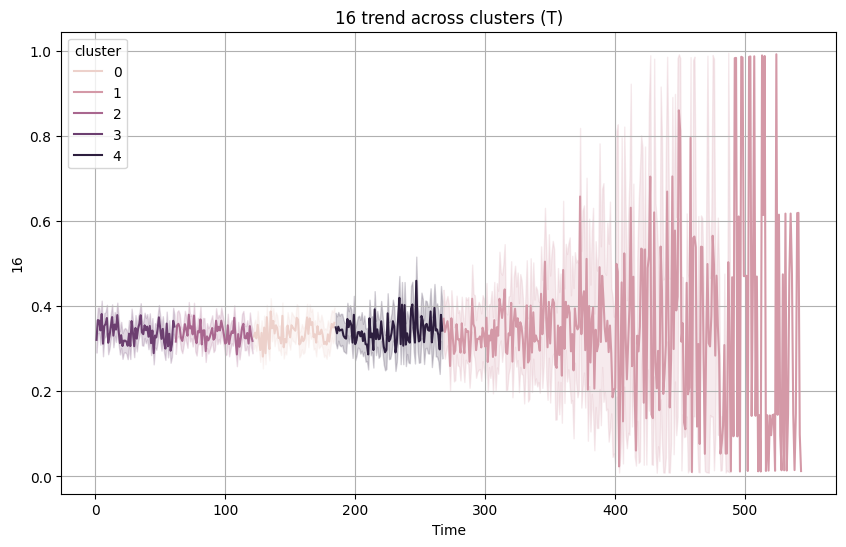

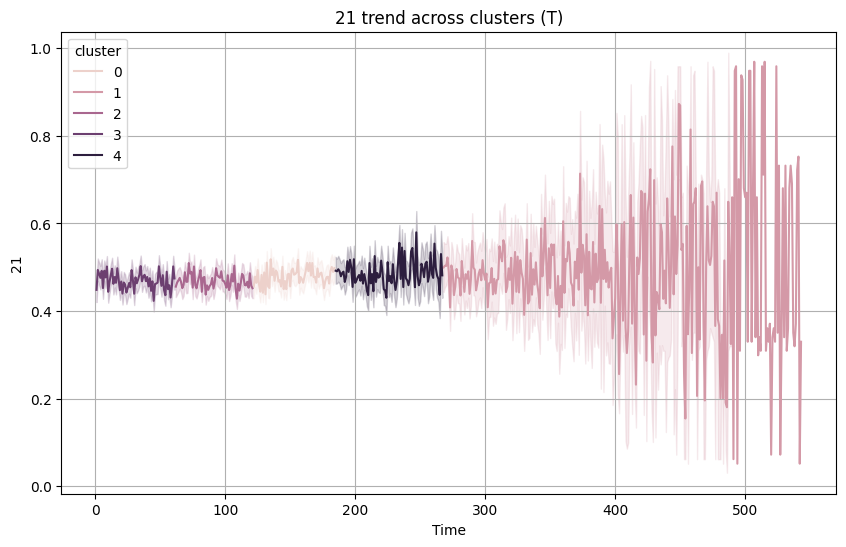

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df24_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0     2
    1     4
    2     1
    3     0
    4     3
  '''

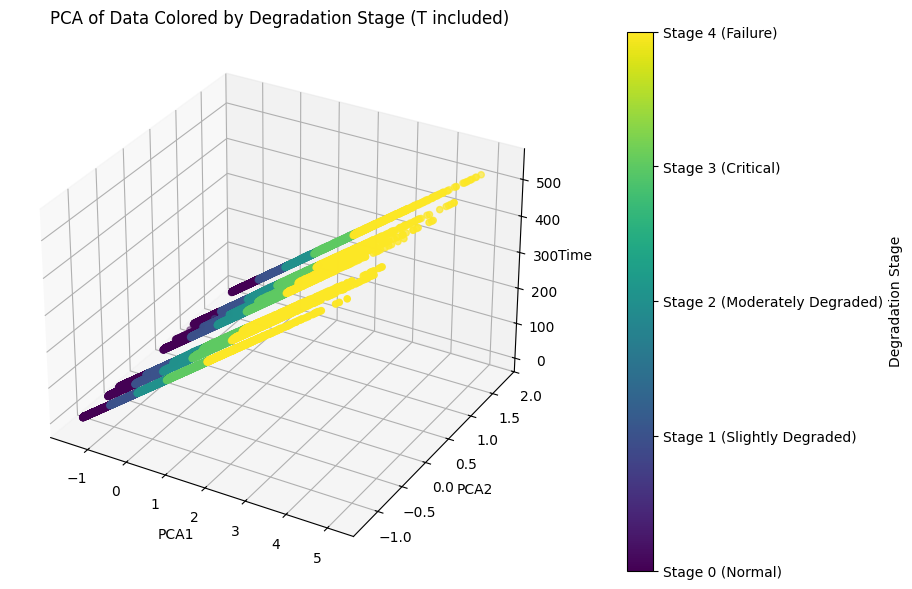

In [ ]:
sensor_cols_T24 = [col for col in df24_cluster_T.columns if col not in [0,'cluster']]
X_T24 = df24_cluster_T[sensor_cols_T24].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T24 = pcat.fit_transform(X_T24)


df24_pca_T= df24_cluster_T.copy()
df24_pca_T['PCA1'] = X_pca_T24[:, 0]
df24_pca_T['PCA2'] = X_pca_T24[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 2,
    1: 4,
    2: 1,
    3: 0,
    4: 3
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df24_pca_T['stage'] = df24_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df24_plot_T = df24_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df24_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df24_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df24_plot_T['PCA1'], df24_plot_T['PCA2'], df24_plot_T[1], c=df24_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()

## *DATASET ALL*

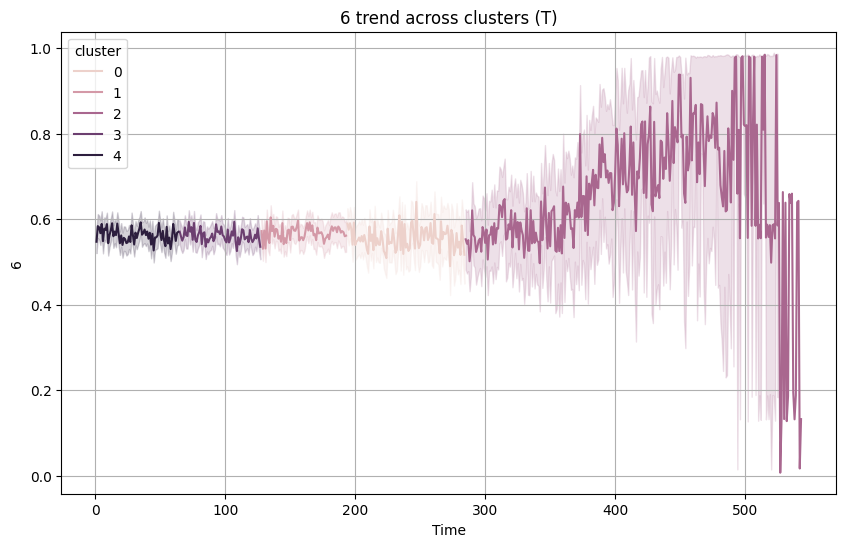

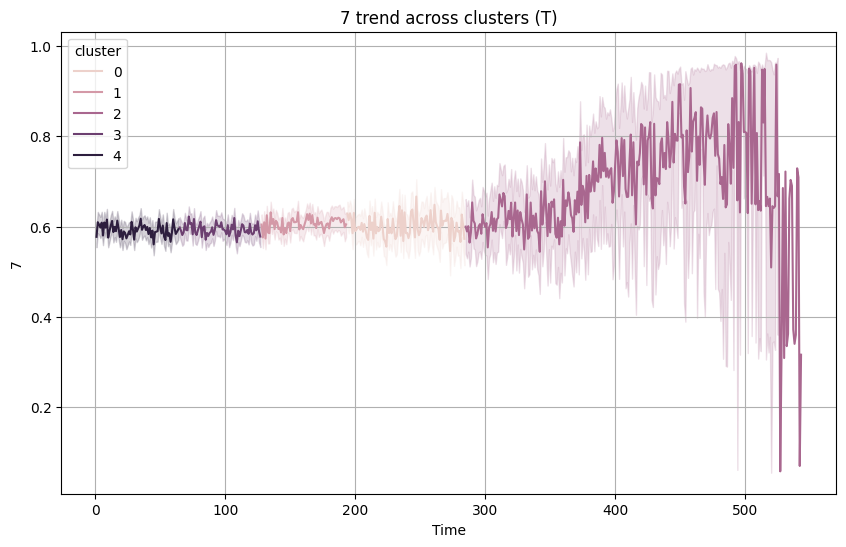

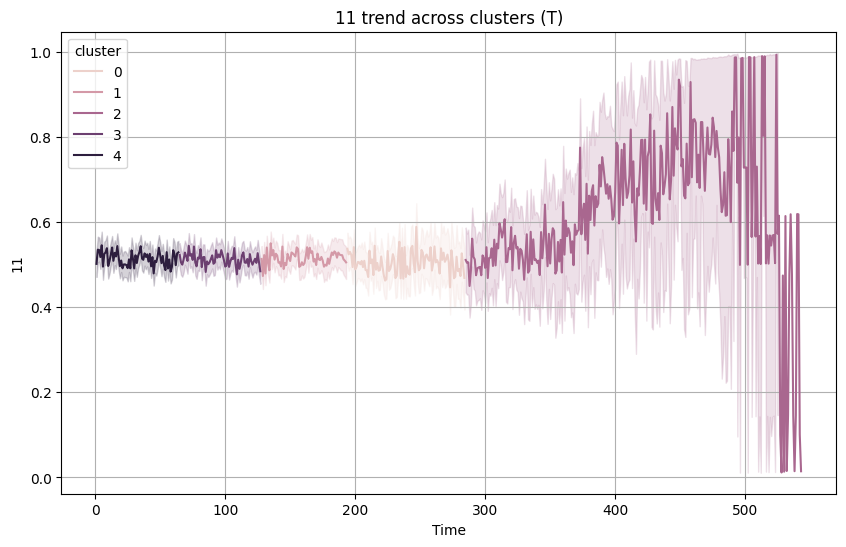

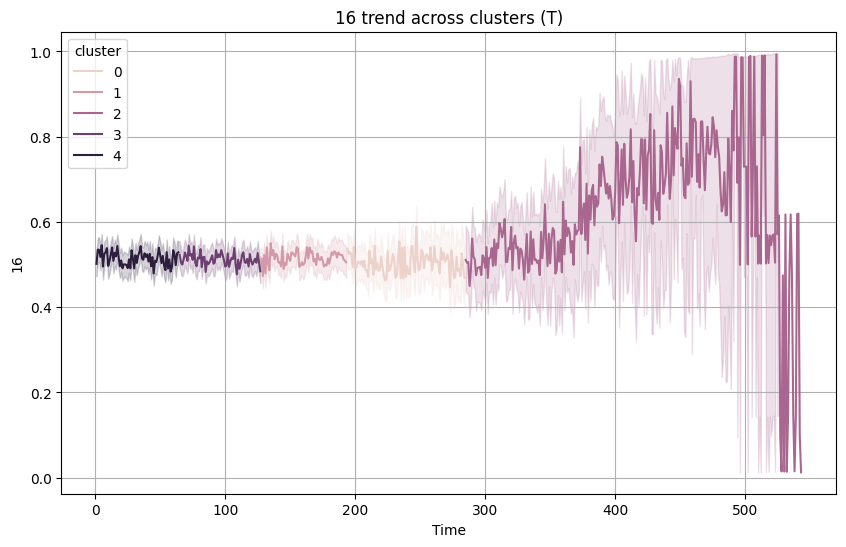

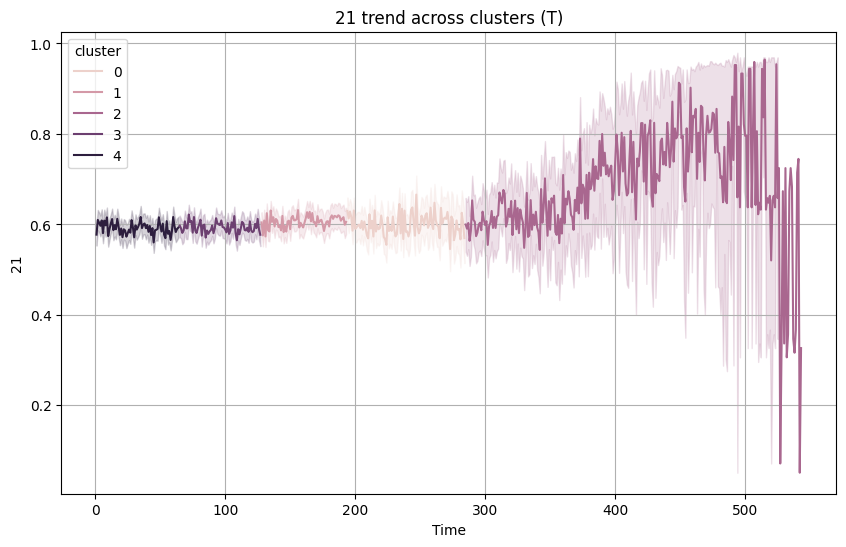

In [ ]:
sensors = [6, 7, 11, 16, 21]
for sensor in sensors:
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=df_all_cluster_T, x=1, y=sensor, hue='cluster')
  plt.title(f'{sensor} trend across clusters (T)')
  plt.xlabel("Time")
  plt.grid(True)
  plt.show()
  '''
  CLUSTER STAGE
    0     3
    1     2
    2     4
    3     1
    4     0
  '''

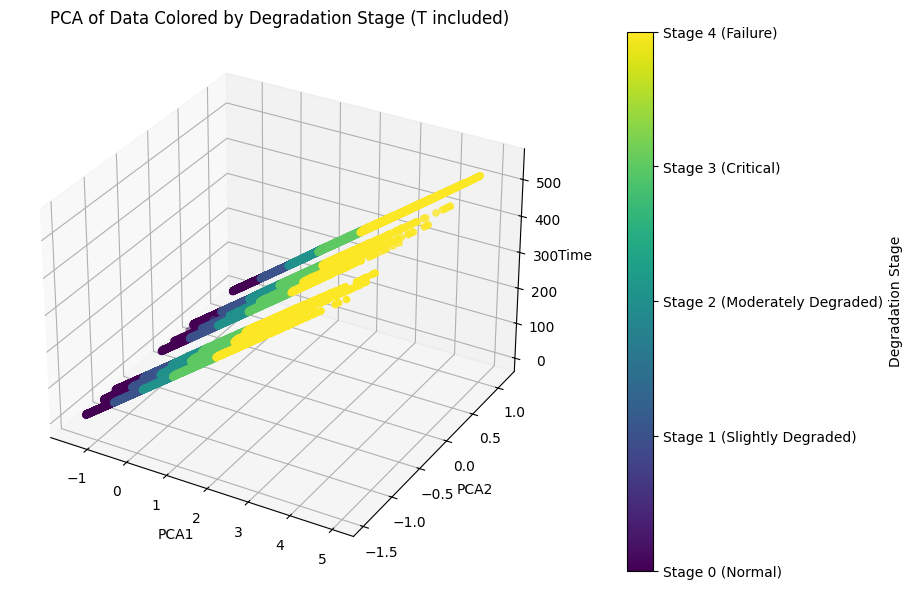

In [ ]:
sensor_cols_T_all = [col for col in df_all_cluster_T.columns if col not in [0,'cluster']]
X_T_all = df_all_cluster_T[sensor_cols_T_all].values
pcat = sk.decomposition.PCA(n_components=2)
X_pca_T_all = pcat.fit_transform(X_T_all)


df_all_pca_T= df_all_cluster_T.copy()
df_all_pca_T['PCA1'] = X_pca_T_all[:, 0]
df_all_pca_T['PCA2'] = X_pca_T_all[:, 1]

# Adjusting cluster names to be assoicated with stages of degradation
cluster_to_stage_T = {
    0: 3,
    1: 2,
    2: 4,
    3: 1,
    4: 0
}
stage_names = {
    0: "Stage 0 (Normal)",
    1: "Stage 1 (Slightly Degraded)",
    2: "Stage 2 (Moderately Degraded)",
    3: "Stage 3 (Critical)",
    4: "Stage 4 (Failure)"
}

# creating a column that associates each sample with its stage
df_all_pca_T['stage'] = df_all_pca_T['cluster'].map(cluster_to_stage_T)

#plotting
df_all_plot_T = df_all_pca_T.copy()
scaler = sk.preprocessing.StandardScaler()
df_all_plot_T[['PCA1', 'PCA2']] = scaler.fit_transform(df_all_plot_T[['PCA1', 'PCA2']])
fig= plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_all_plot_T['PCA1'], df_all_plot_T['PCA2'], df_all_plot_T[1], c=df_all_plot_T['stage'], cmap='viridis', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Time')
ax.set_title("PCA of Data Colored by Degradation Stage (T included)")
# adding a colorbar with the stage names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1, ticks=range(5))
cbar.ax.set_yticklabels([stage_names[i] for i in range(5)])
cbar.set_label("Degradation Stage")
plt.show()

# PHASE 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# Function to prepare data for classification without data leakage
def prepare_data_for_classification(df):
    """
    Prepares data for classification while avoiding data leakage
    """
    # Get the stage labels (from the mapping of clusters to stages)
    # This follows your Phase 1 mapping but excludes the cluster column from features
    y = df['stage'].values

    # Use only sensor data as features
    # Exclude: stage, cluster, PCA1, PCA2, and time (column 1)
    sensor_cols = [col for col in df.columns if col not in [0, 1, 'cluster', 'stage', 'PCA1', 'PCA2']]

    # Print the selected sensor columns for verification
    print(f"Using {len(sensor_cols)} sensor features: {sensor_cols}")

    # Create feature matrix with only sensor readings
    X = df[sensor_cols].values

    # Split data ensuring time-based ordering is preserved
    # This is important for predictive maintenance as we want to predict future degradation
    # Sort the indices first to ensure temporal ordering
    indices = np.arange(len(X))
    train_idx, test_idx = train_test_split(indices, test_size=0.3, random_state=42, stratify=y)

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Scale the features to improve model performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Print class distribution to verify
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    unique_test, counts_test = np.unique(y_test, return_counts=True)

    print("\nClass distribution in training set:")
    for i, (stage, count) in enumerate(zip(unique_train, counts_train)):
        print(f"Stage {stage}: {count} samples ({count/len(y_train)*100:.2f}%)")

    print("\nClass distribution in test set:")
    for i, (stage, count) in enumerate(zip(unique_test, counts_test)):
        print(f"Stage {stage}: {count} samples ({count/len(y_test)*100:.2f}%)")

    return X_train_scaled, X_test_scaled, y_train, y_test, sensor_cols, scaler

In [ ]:
# Function to handle class imbalance using SMOTE
def apply_smote(X_train, y_train):
    """
    Applies SMOTE to handle class imbalance
    """
    print("Applying SMOTE to balance classes...")
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Print the new class distribution
    unique, counts = np.unique(y_train_smote, return_counts=True)
    print("\nClass distribution after SMOTE:")
    for stage, count in zip(unique, counts):
        print(f"Stage {stage}: {count} samples ({count/len(y_train_smote)*100:.2f}%)")

    return X_train_smote, y_train_smote

In [ ]:
# Function to evaluate model performance with focus on critical stages
def evaluate_model(model, X_test, y_test, model_name, critical_stages=[3, 4]):
    """
    Evaluates the model with emphasis on critical stages
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Display classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[
        "Stage 0 (Normal)",
        "Stage 1 (Slightly Degraded)",
        "Stage 2 (Moderately Degraded)",
        "Stage 3 (Critical)",
        "Stage 4 (Failure)"
    ]))

    # Create and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Stage 0", "Stage 1", "Stage 2", "Stage 3", "Stage 4"],
                yticklabels=["Stage 0", "Stage 1", "Stage 2", "Stage 3", "Stage 4"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Calculate metrics for critical stages
    # Filter test set for critical stages only
    critical_indices = np.where(np.isin(y_test, critical_stages))[0]

    if len(critical_indices) > 0:
        y_test_critical = y_test[critical_indices]
        y_pred_critical = y_pred[critical_indices]

        critical_accuracy = accuracy_score(y_test_critical, y_pred_critical)
        critical_f1 = f1_score(y_test_critical, y_pred_critical, average='weighted')

        print(f"\nPerformance on Critical Stages {critical_stages}:")
        print(f"Accuracy: {critical_accuracy:.4f}")
        print(f"F1 Score: {critical_f1:.4f}")

        # Confusion matrix for critical stages
        cm_critical = confusion_matrix(y_test_critical, y_pred_critical)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_critical, annot=True, fmt='d', cmap='Reds')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Critical Stages - {model_name}')
        plt.show()
    else:
        print(f"\nNo critical stage samples in the test set")
        critical_accuracy = None
        critical_f1 = None

    return accuracy, f1, critical_accuracy, critical_f1, cm

In [ ]:
# Function to analyze feature importance
def analyze_feature_importance(model, feature_names, model_name):
    """
    Analyzes and visualizes feature importance for tree-based models
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        # Plot feature importance
        plt.figure(figsize=(12, 8))
        plt.title(f'Feature Importance - {model_name}')
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

        # Print top 10 important features
        print("\nTop 10 Important Features:")
        for i in range(min(10, len(indices))):
            print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
    else:
        print(f"\nFeature importance not available for {model_name}")

In [ ]:
# Function to train multiple classification models
def train_classification_models(X_train, y_train, X_test, y_test, feature_names, use_smote=True):
    """
    Trains multiple classification models and evaluates their performance
    """
    # Apply SMOTE if requested
    if use_smote:
        X_train, y_train = apply_smote(X_train, y_train)

    # Initialize models with balanced class weights
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    }

    # Dictionary to store results
    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n{'-'*50}")
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        # Evaluate model
        accuracy, f1, critical_accuracy, critical_f1, cm = evaluate_model(model, X_test, y_test, name)

        # Store results
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'f1_score': f1,
            'critical_accuracy': critical_accuracy,
            'critical_f1': critical_f1,
            'confusion_matrix': cm
        }

        # Analyze feature importance for Random Forest
        if name == 'Random Forest':
            analyze_feature_importance(model, feature_names, name)

    return results

In [ ]:
# Function to compare model performances
def compare_models(results):
    """
    Compares and visualizes performance of different models
    """
    # Extract metrics for comparison
    model_names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names]
    f1_scores = [results[name]['f1_score'] for name in model_names]
    critical_accuracies = [results[name]['critical_accuracy'] for name in model_names if results[name]['critical_accuracy'] is not None]
    critical_f1s = [results[name]['critical_f1'] for name in model_names if results[name]['critical_f1'] is not None]

    # Create bar chart for comparison
    plt.figure(figsize=(14, 10))

    # Plot overall accuracy
    plt.subplot(2, 2, 1)
    plt.bar(model_names, accuracies, color='skyblue')
    plt.ylim(0, 1.0)
    plt.title('Model Overall Accuracy')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Plot F1 score
    plt.subplot(2, 2, 2)
    plt.bar(model_names, f1_scores, color='lightgreen')
    plt.ylim(0, 1.0)
    plt.title('Model F1 Score (Weighted)')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)

    # Plot critical stage metrics if available
    if critical_accuracies and critical_f1s:
        # Get model names with critical metrics
        critical_models = [name for name in model_names if results[name]['critical_accuracy'] is not None]

        # Plot critical accuracy
        plt.subplot(2, 2, 3)
        plt.bar(critical_models, critical_accuracies, color='salmon')
        plt.ylim(0, 1.0)
        plt.title('Critical Stages Accuracy')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)

        # Plot critical F1
        plt.subplot(2, 2, 4)
        plt.bar(critical_models, critical_f1s, color='lightpink')
        plt.ylim(0, 1.0)
        plt.title('Critical Stages F1 Score')
        plt.ylabel('F1 Score')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Find best model based on critical stage performance if available
    if critical_f1s:
        best_critical_idx = np.argmax(critical_f1s)
        best_model_name = [name for name in model_names if results[name]['critical_f1'] is not None][best_critical_idx]
    else:
        best_model_name = model_names[np.argmax(f1_scores)]

    print(f"\nBest performing model: {best_model_name}")
    print(f"Overall Accuracy: {results[best_model_name]['accuracy']:.4f}")
    print(f"Overall F1 Score: {results[best_model_name]['f1_score']:.4f}")

    if results[best_model_name]['critical_accuracy'] is not None:
        print(f"Critical Stages Accuracy: {results[best_model_name]['critical_accuracy']:.4f}")
        print(f"Critical Stages F1 Score: {results[best_model_name]['critical_f1']:.4f}")

    return best_model_name, results[best_model_name]['model']

In [ ]:
# Function to perform hyperparameter tuning for the best model
def tune_best_model(best_model_name, X_train, y_train, X_test, y_test):
    """
    Performs hyperparameter tuning for the best model
    """
    print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

    # Define parameter grids for each model type
    param_grids = {
        'Logistic Regression': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga']
        },
        'KNN': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1: Manhattan, 2: Euclidean
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'gamma': [0.01, 0.1, 'scale'],
            'kernel': ['rbf', 'linear']
        },
        'Random Forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }

    # Get the appropriate model and parameter grid
    if best_model_name == 'Logistic Regression':
        model = LogisticRegression(class_weight='balanced', random_state=42)
    elif best_model_name == 'KNN':
        model = KNeighborsClassifier()
    elif best_model_name == 'SVM':
        model = SVC(class_weight='balanced', probability=True, random_state=42)
    elif best_model_name == 'Random Forest':
        model = RandomForestClassifier(class_weight='balanced', random_state=42)

    param_grid = param_grids[best_model_name]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring='f1_weighted',
        verbose=1, n_jobs=-1, return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    # Get best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"\nBest parameters: {best_params}")

    # Evaluate tuned model
    accuracy, f1, critical_accuracy, critical_f1, cm = evaluate_model(
        best_model, X_test, y_test, f"Tuned {best_model_name}"
    )

    return best_model, best_params, accuracy, f1, critical_accuracy, critical_f1

In [ ]:
# Main function to run Phase 2 on a dataset
def run_phase2(df_name, df_cluster_T, cluster_to_stage_map):
    """
    Runs Phase 2 classification on the provided dataset
    """
    print(f"\n{'='*70}")
    print(f"Running Phase 2: Classification Model for {df_name}")
    print(f"{'='*70}")

    # Create a copy of the dataframe
    df = df_cluster_T.copy()

    # Map clusters to stages
    df['stage'] = df['cluster'].map(cluster_to_stage_map)

    # Display class distribution
    stage_counts = df['stage'].value_counts().sort_index()
    print("\nDegradation Stage Distribution:")
    for stage, count in stage_counts.items():
        print(f"Stage {stage}: {count} samples ({count/len(df)*100:.2f}%)")

    # Prepare data for classification
    X_train, X_test, y_train, y_test, feature_names, scaler = prepare_data_for_classification(df)

    # Train classification models
    print("\nTraining classification models...")
    results = train_classification_models(X_train, y_train, X_test, y_test, feature_names)

    # Compare model performances
    best_model_name, best_model = compare_models(results)

    # Tune best model
    tuned_model, best_params, tuned_accuracy, tuned_f1, tuned_critical_accuracy, tuned_critical_f1 = tune_best_model(
        best_model_name, X_train, y_train, X_test, y_test
    )

    # Return results
    return {
        'best_model_name': best_model_name,
        'best_model': best_model,
        'tuned_model': tuned_model,
        'best_params': best_params,
        'scaler': scaler,
        'feature_names': feature_names,
        'accuracy': tuned_accuracy,
        'f1_score': tuned_f1,
        'critical_accuracy': tuned_critical_accuracy,
        'critical_f1': tuned_critical_f1
    }


Running Phase 2: Classification Model for Dataset 1

Degradation Stage Distribution:
Stage 0: 5000 samples (24.24%)
Stage 1: 5000 samples (24.24%)
Stage 2: 5117 samples (24.80%)
Stage 3: 4158 samples (20.15%)
Stage 4: 1356 samples (6.57%)
Using 17 sensor features: [2, 3, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]

Class distribution in training set:
Stage 0: 3500 samples (24.24%)
Stage 1: 3500 samples (24.24%)
Stage 2: 3582 samples (24.80%)
Stage 3: 2910 samples (20.15%)
Stage 4: 949 samples (6.57%)

Class distribution in test set:
Stage 0: 1500 samples (24.23%)
Stage 1: 1500 samples (24.23%)
Stage 2: 1535 samples (24.80%)
Stage 3: 1248 samples (20.16%)
Stage 4: 407 samples (6.58%)

Training classification models...
Applying SMOTE to balance classes...

Class distribution after SMOTE:
Stage 0: 3582 samples (20.00%)
Stage 1: 3582 samples (20.00%)
Stage 2: 3582 samples (20.00%)
Stage 3: 3582 samples (20.00%)
Stage 4: 3582 samples (20.00%)

---------------------------------

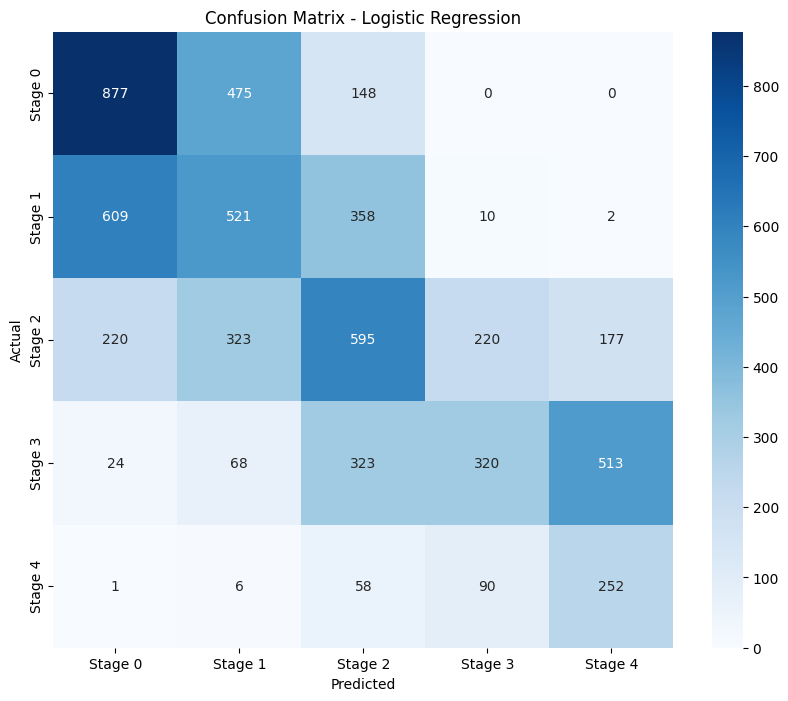


Performance on Critical Stages [3, 4]:
Accuracy: 0.3456
F1 Score: 0.3968


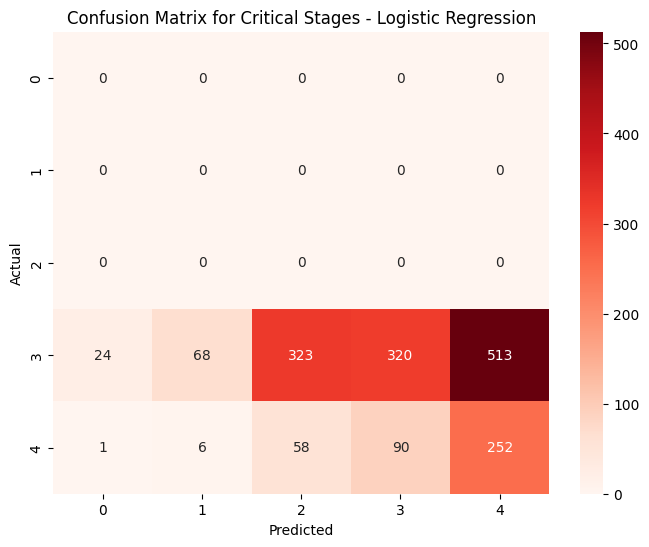


--------------------------------------------------
Training KNN...

KNN Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.43      0.58      0.49      1500
  Stage 1 (Slightly Degraded)       0.35      0.32      0.34      1500
Stage 2 (Moderately Degraded)       0.39      0.25      0.30      1535
           Stage 3 (Critical)       0.50      0.36      0.42      1248
            Stage 4 (Failure)       0.23      0.54      0.32       407

                     accuracy                           0.39      6190
                    macro avg       0.38      0.41      0.38      6190
                 weighted avg       0.40      0.39      0.38      6190



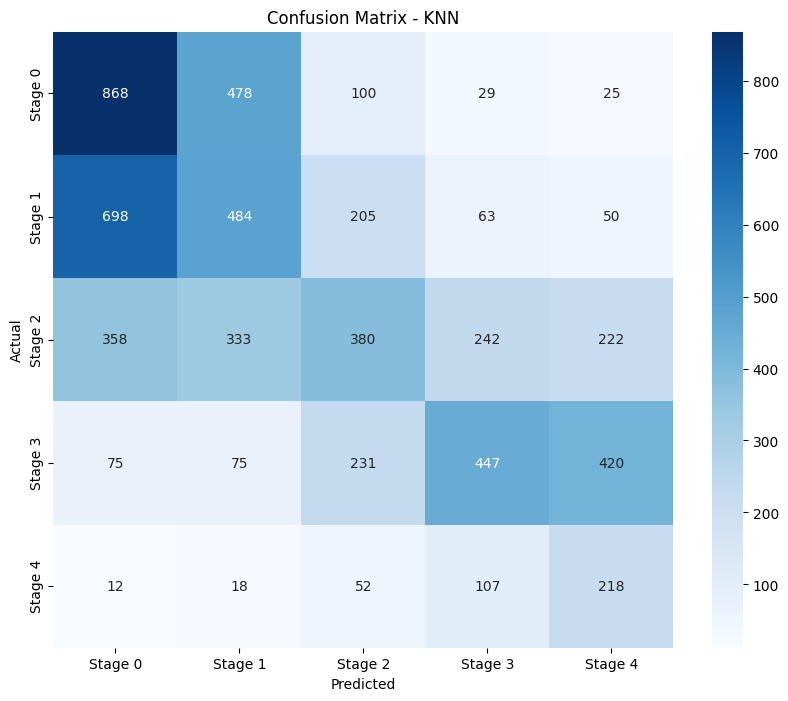


Performance on Critical Stages [3, 4]:
Accuracy: 0.4018
F1 Score: 0.4767


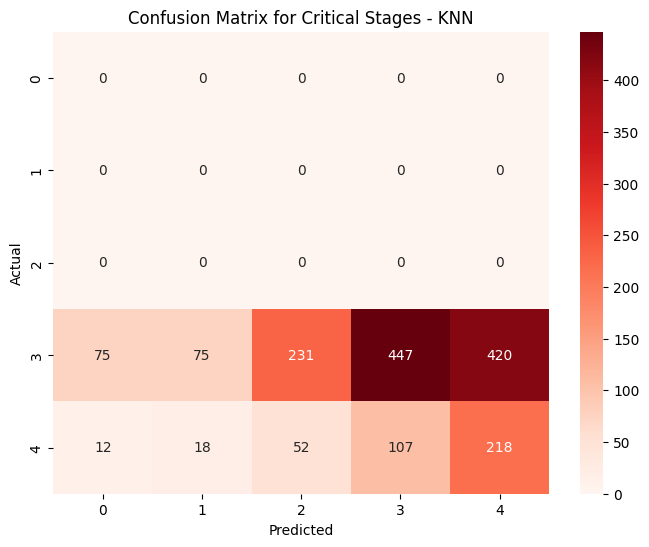


--------------------------------------------------
Training SVM...

SVM Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.50      0.65      0.57      1500
  Stage 1 (Slightly Degraded)       0.37      0.40      0.39      1500
Stage 2 (Moderately Degraded)       0.47      0.35      0.40      1535
           Stage 3 (Critical)       0.62      0.33      0.43      1248
            Stage 4 (Failure)       0.29      0.59      0.39       407

                     accuracy                           0.44      6190
                    macro avg       0.45      0.46      0.43      6190
                 weighted avg       0.47      0.44      0.44      6190



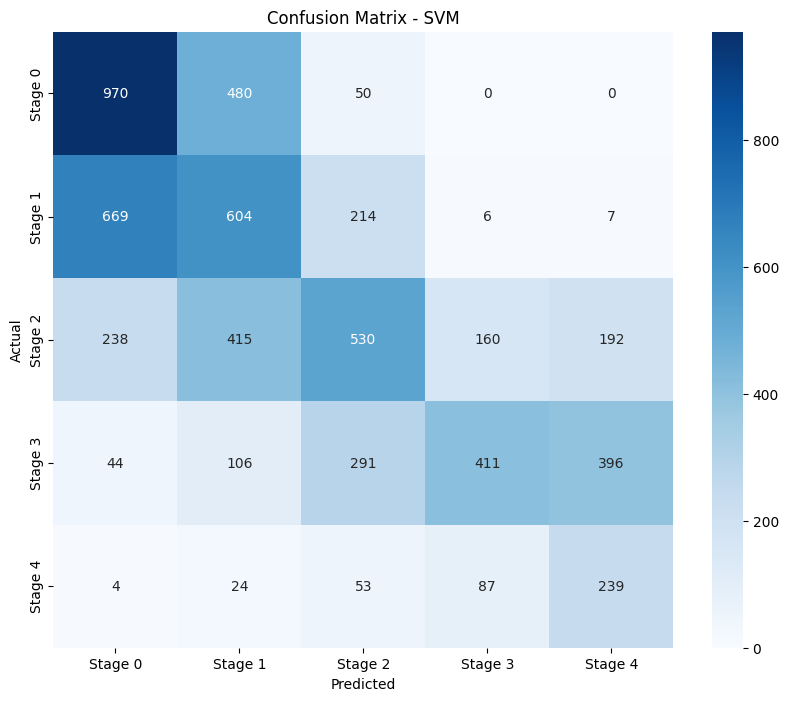


Performance on Critical Stages [3, 4]:
Accuracy: 0.3927
F1 Score: 0.4678


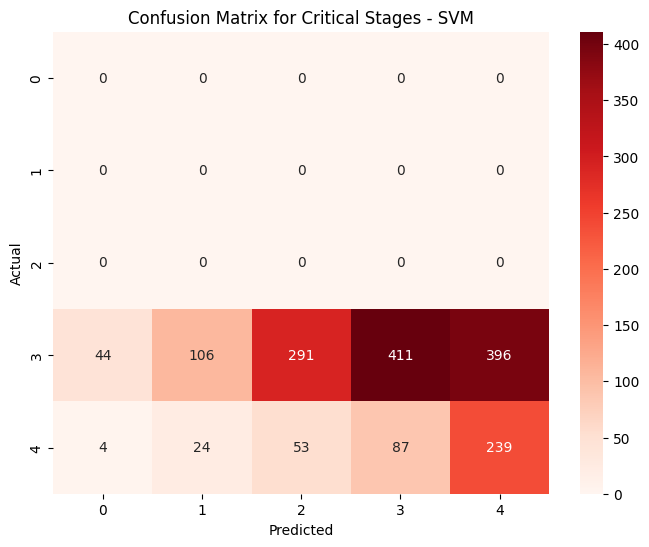


--------------------------------------------------
Training Random Forest...

Random Forest Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.50      0.60      0.54      1500
  Stage 1 (Slightly Degraded)       0.38      0.41      0.39      1500
Stage 2 (Moderately Degraded)       0.45      0.39      0.42      1535
           Stage 3 (Critical)       0.58      0.50      0.53      1248
            Stage 4 (Failure)       0.38      0.36      0.37       407

                     accuracy                           0.46      6190
                    macro avg       0.46      0.45      0.45      6190
                 weighted avg       0.47      0.46      0.46      6190



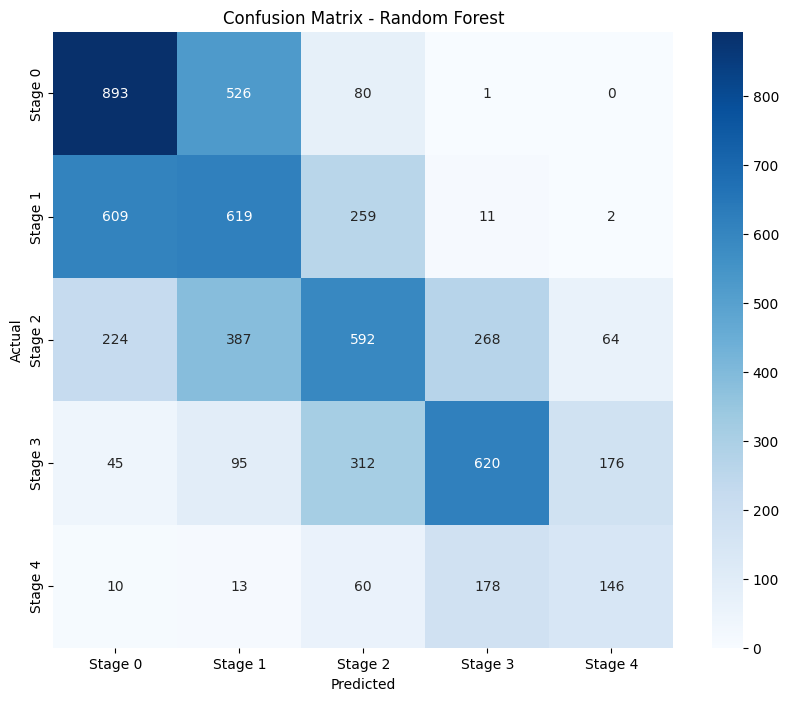


Performance on Critical Stages [3, 4]:
Accuracy: 0.4628
F1 Score: 0.5555


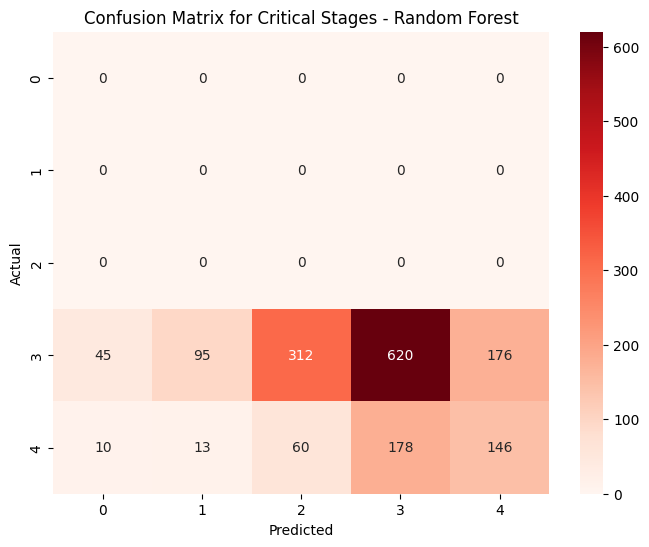

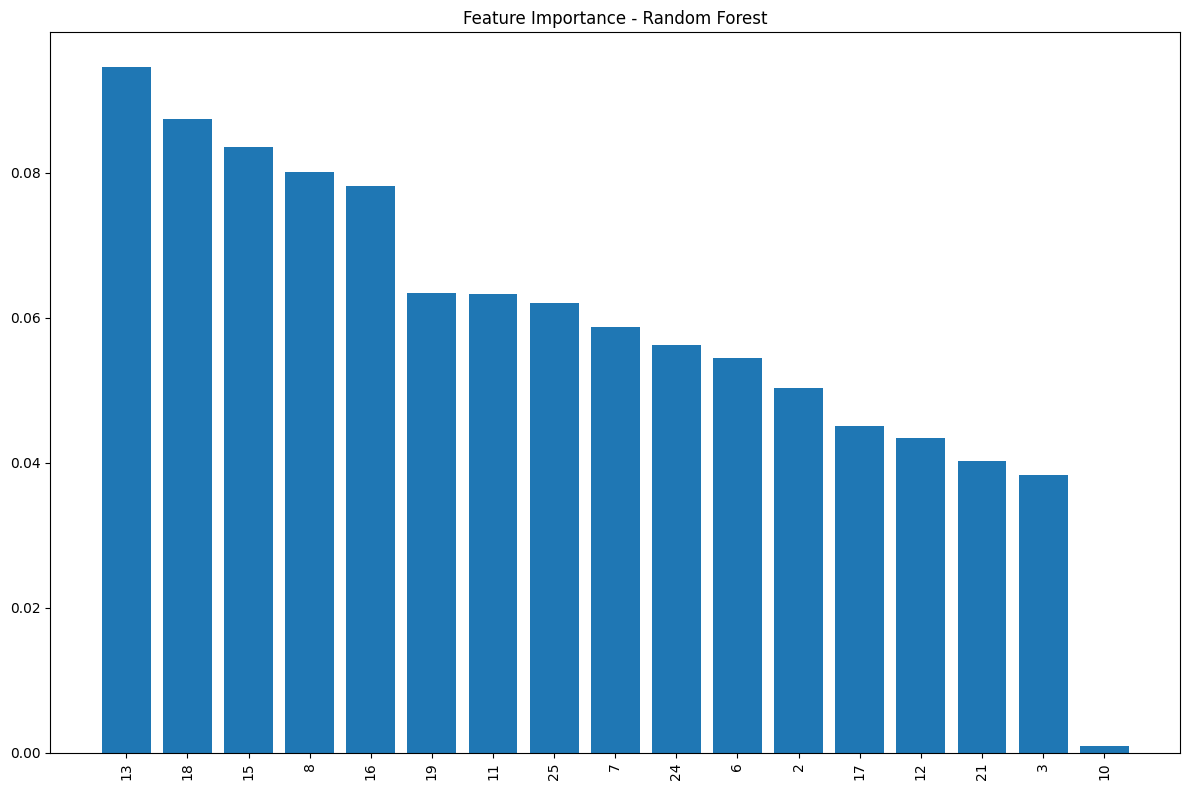


Top 10 Important Features:
13: 0.0947
18: 0.0875
15: 0.0835
8: 0.0801
16: 0.0781
19: 0.0634
11: 0.0633
25: 0.0620
7: 0.0587
24: 0.0562


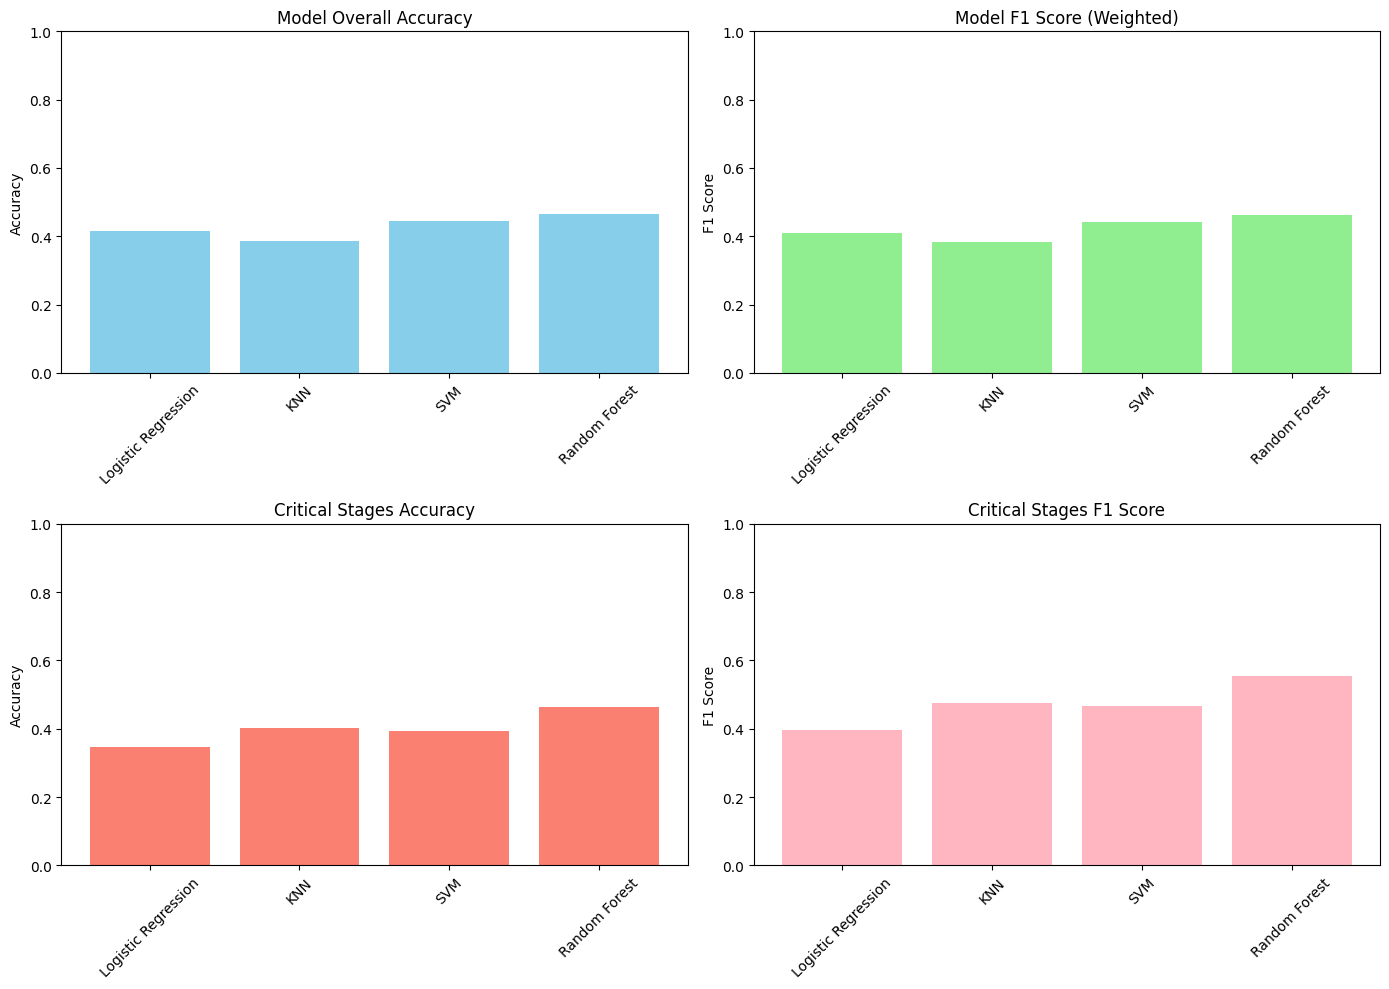


Best performing model: Random Forest
Overall Accuracy: 0.4637
Overall F1 Score: 0.4625
Critical Stages Accuracy: 0.4628
Critical Stages F1 Score: 0.5555

Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}

Tuned Random Forest Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.51      0.61      0.56      1500
  Stage 1 (Slightly Degraded)       0.38      0.41      0.40      1500
Stage 2 (Moderately Degraded)       0.47      0.41      0.44      1535
           Stage 3 (Critical)       0.58      0.56      0.57      1248
            Stage 4 (Failure)       0.42      0.22      0.29       407

                     accuracy                           0.48      6190
                    macro avg       0.47      0.44      0.45      6190
                 weighted avg    

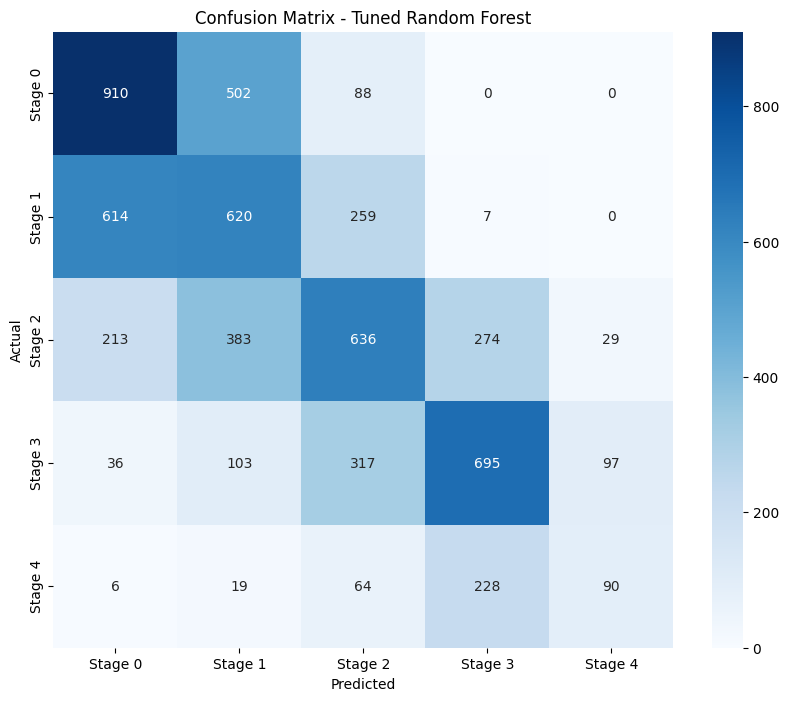


Performance on Critical Stages [3, 4]:
Accuracy: 0.4743
F1 Score: 0.5573


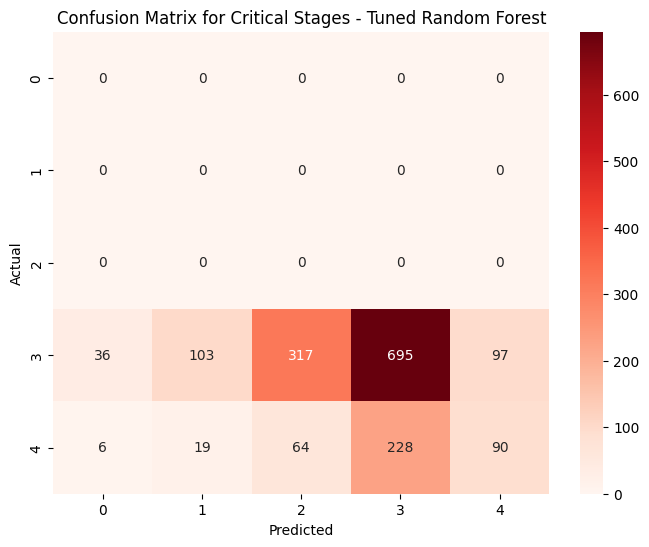


Running Phase 2: Classification Model for Dataset 1 & 3

Degradation Stage Distribution:
Stage 0: 12800 samples (28.22%)
Stage 1: 13198 samples (29.10%)
Stage 2: 12298 samples (27.12%)
Stage 3: 5393 samples (11.89%)
Stage 4: 1662 samples (3.66%)
Using 18 sensor features: [2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 24, 25]

Class distribution in training set:
Stage 0: 8960 samples (28.22%)
Stage 1: 9238 samples (29.10%)
Stage 2: 8609 samples (27.12%)
Stage 3: 3775 samples (11.89%)
Stage 4: 1163 samples (3.66%)

Class distribution in test set:
Stage 0: 3840 samples (28.22%)
Stage 1: 3960 samples (29.10%)
Stage 2: 3689 samples (27.11%)
Stage 3: 1618 samples (11.89%)
Stage 4: 499 samples (3.67%)

Training classification models...
Applying SMOTE to balance classes...

Class distribution after SMOTE:
Stage 0: 9238 samples (20.00%)
Stage 1: 9238 samples (20.00%)
Stage 2: 9238 samples (20.00%)
Stage 3: 9238 samples (20.00%)
Stage 4: 9238 samples (20.00%)

---------------------

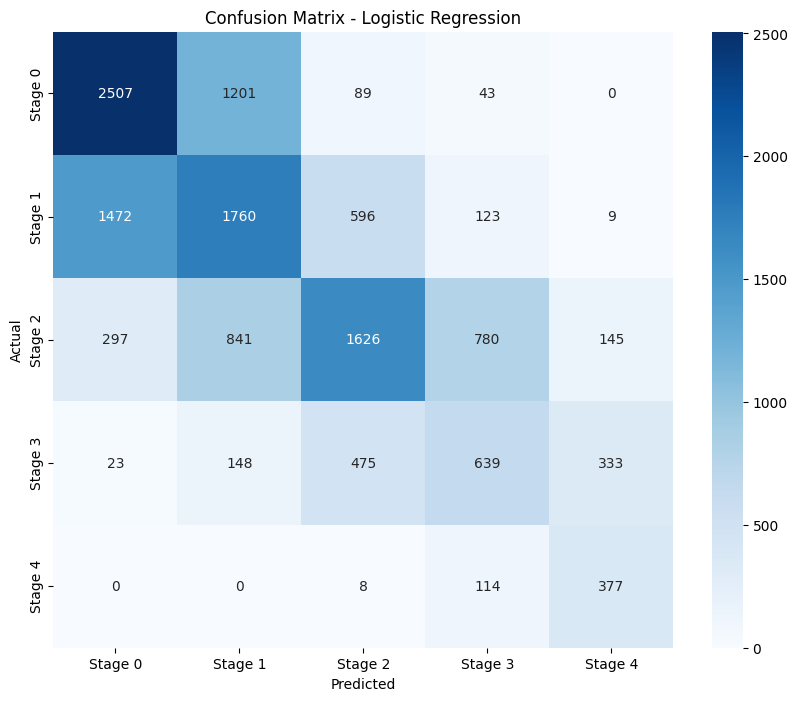


Performance on Critical Stages [3, 4]:
Accuracy: 0.4799
F1 Score: 0.5590


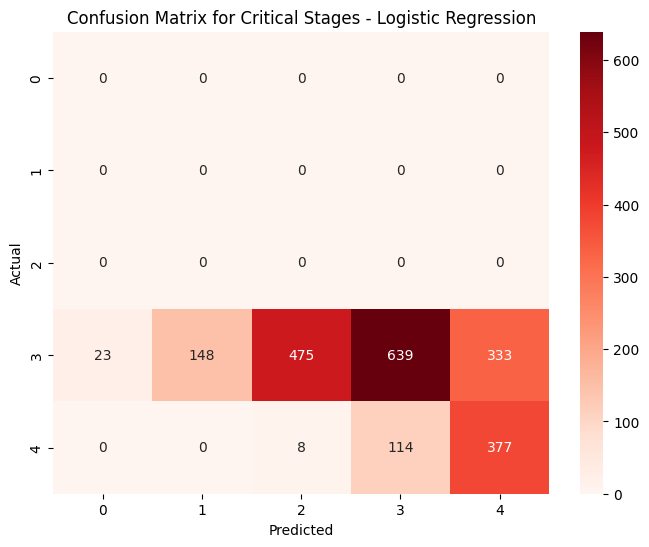


--------------------------------------------------
Training KNN...

KNN Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.53      0.63      0.58      3840
  Stage 1 (Slightly Degraded)       0.44      0.38      0.41      3960
Stage 2 (Moderately Degraded)       0.56      0.35      0.43      3689
           Stage 3 (Critical)       0.32      0.45      0.38      1618
            Stage 4 (Failure)       0.35      0.65      0.45       499

                     accuracy                           0.46     13606
                    macro avg       0.44      0.49      0.45     13606
                 weighted avg       0.48      0.46      0.46     13606



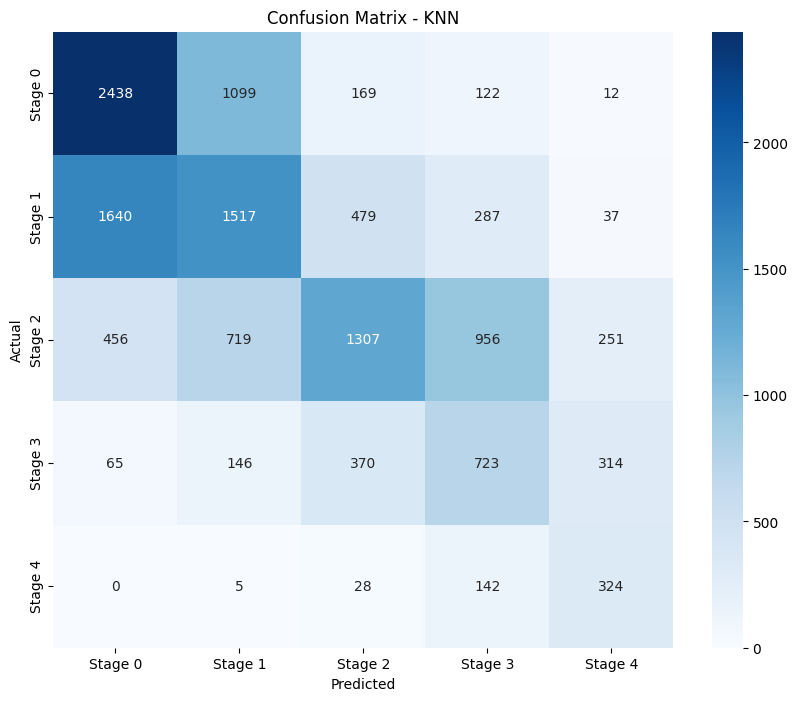


Performance on Critical Stages [3, 4]:
Accuracy: 0.4946
F1 Score: 0.5794


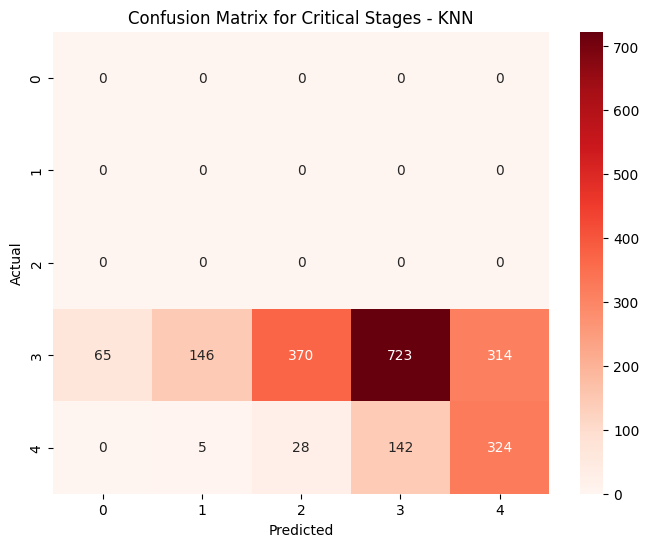


--------------------------------------------------
Training SVM...

SVM Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.57      0.76      0.65      3840
  Stage 1 (Slightly Degraded)       0.48      0.42      0.45      3960
Stage 2 (Moderately Degraded)       0.65      0.43      0.52      3689
           Stage 3 (Critical)       0.40      0.40      0.40      1618
            Stage 4 (Failure)       0.41      0.81      0.54       499

                     accuracy                           0.53     13606
                    macro avg       0.50      0.56      0.51     13606
                 weighted avg       0.54      0.53      0.52     13606



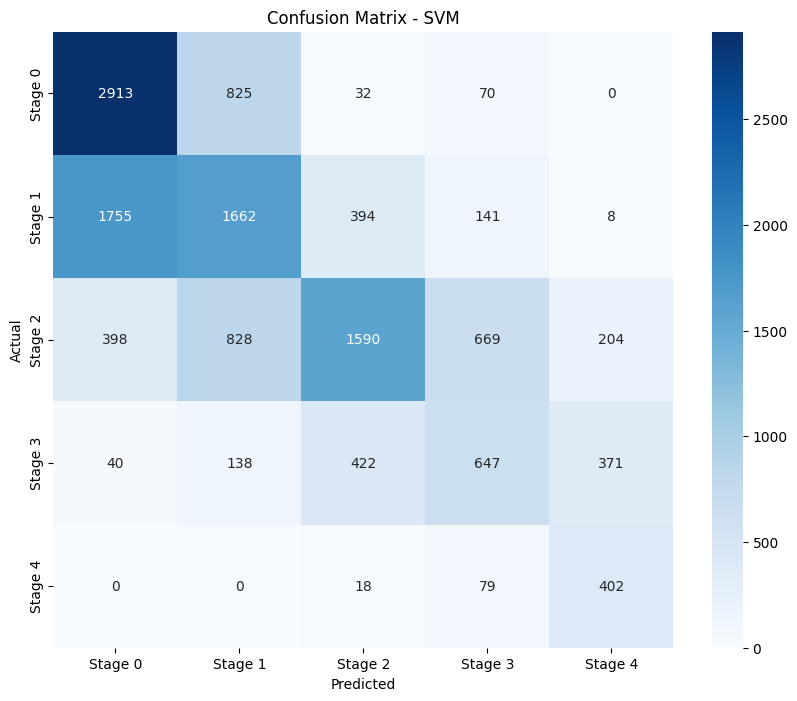


Performance on Critical Stages [3, 4]:
Accuracy: 0.4955
F1 Score: 0.5709


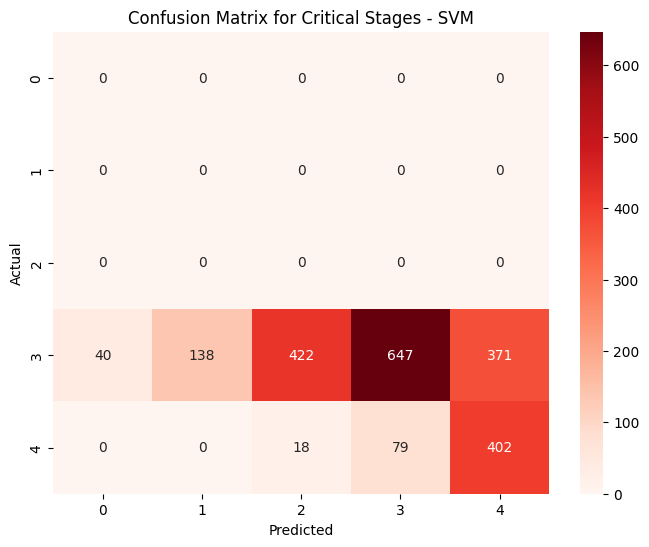


--------------------------------------------------
Training Random Forest...

Random Forest Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.58      0.71      0.64      3840
  Stage 1 (Slightly Degraded)       0.48      0.44      0.46      3960
Stage 2 (Moderately Degraded)       0.61      0.52      0.56      3689
           Stage 3 (Critical)       0.48      0.42      0.45      1618
            Stage 4 (Failure)       0.49      0.67      0.57       499

                     accuracy                           0.54     13606
                    macro avg       0.53      0.55      0.53     13606
                 weighted avg       0.54      0.54      0.54     13606



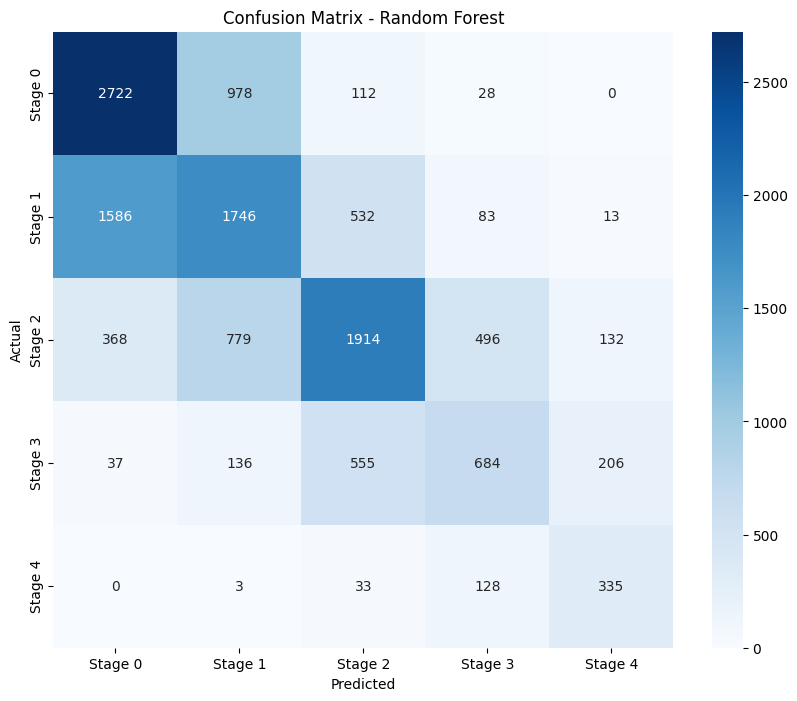


Performance on Critical Stages [3, 4]:
Accuracy: 0.4813
F1 Score: 0.5821


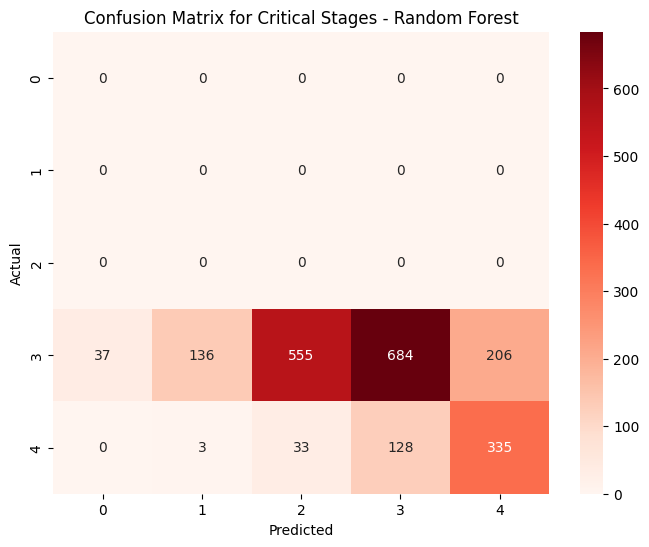

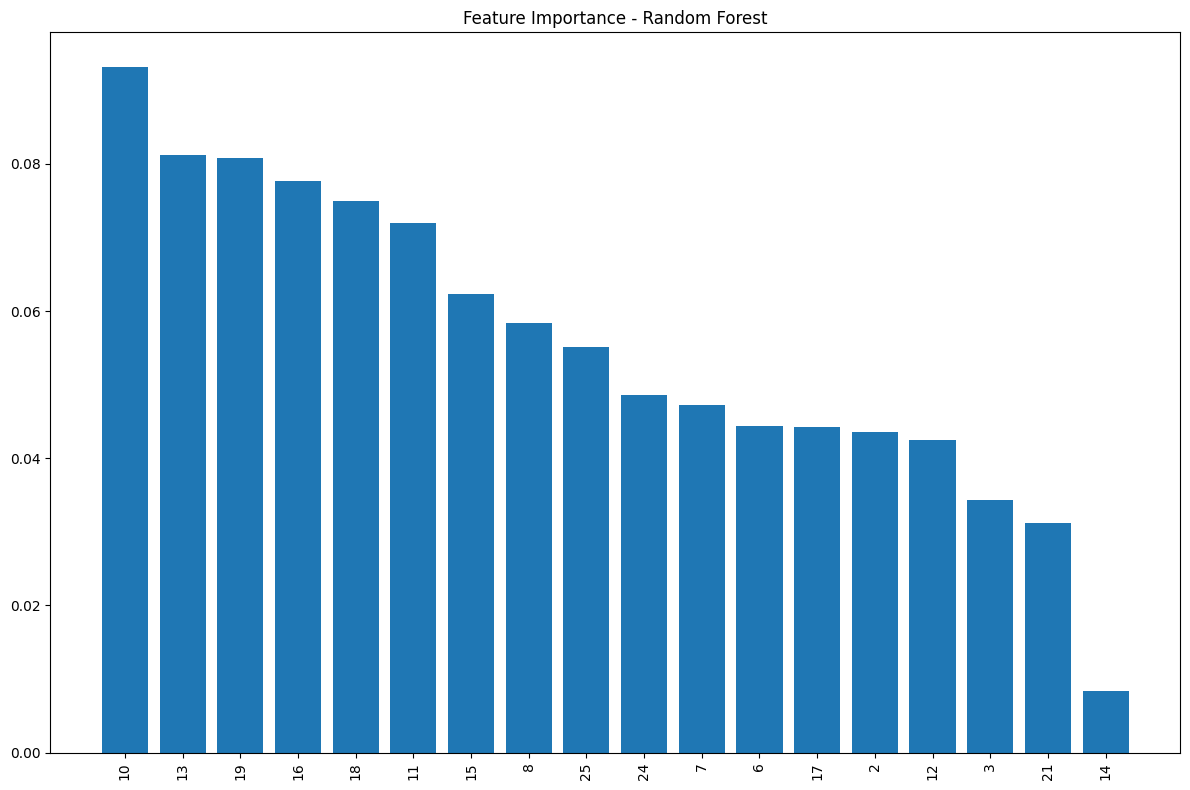


Top 10 Important Features:
10: 0.0932
13: 0.0812
19: 0.0808
16: 0.0776
18: 0.0750
11: 0.0719
15: 0.0624
8: 0.0584
25: 0.0551
24: 0.0486


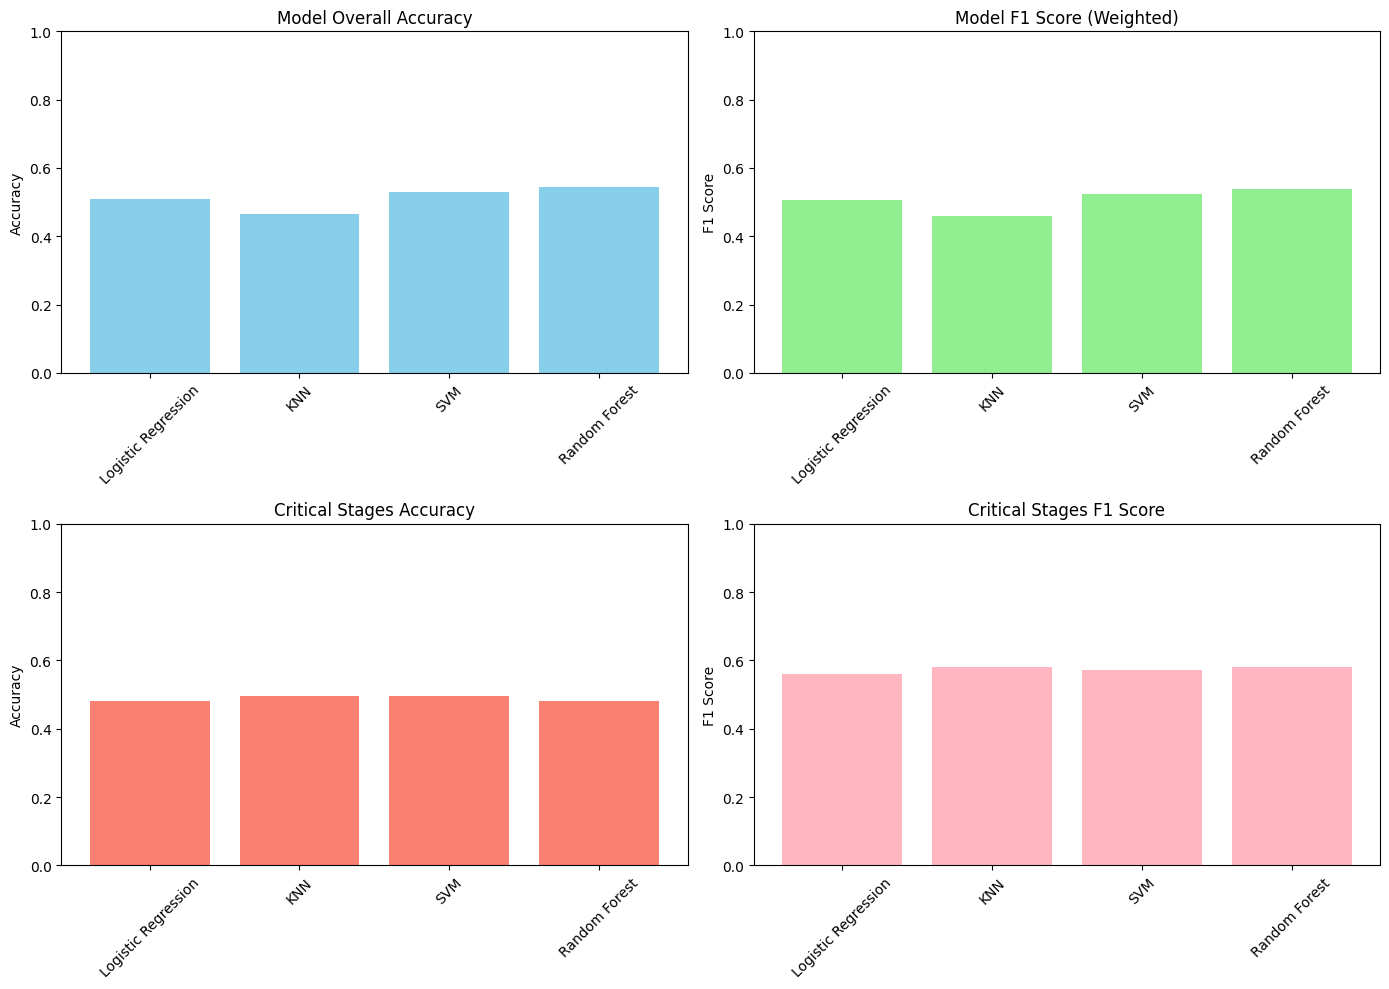


Best performing model: Random Forest
Overall Accuracy: 0.5440
Overall F1 Score: 0.5395
Critical Stages Accuracy: 0.4813
Critical Stages F1 Score: 0.5821

Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Tuned Random Forest Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.59      0.71      0.65      3840
  Stage 1 (Slightly Degraded)       0.48      0.47      0.47      3960
Stage 2 (Moderately Degraded)       0.61      0.58      0.60      3689
           Stage 3 (Critical)       0.54      0.40      0.46      1618
            Stage 4 (Failure)       0.60      0.53      0.56       499

                     accuracy                           0.56     13606
                    macro avg       0.56      0.54      0.55     13606
                 weighted avg   

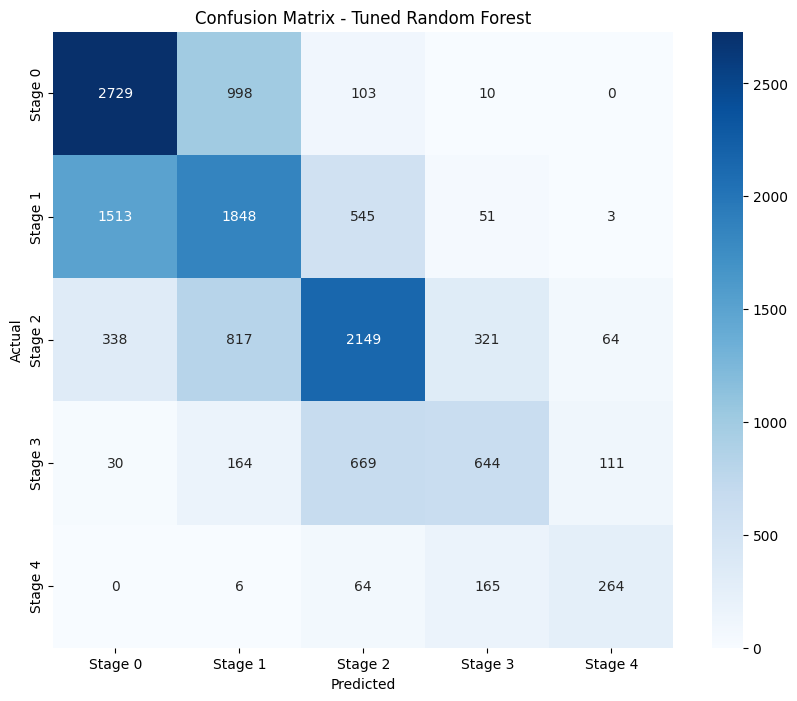


Performance on Critical Stages [3, 4]:
Accuracy: 0.4289
F1 Score: 0.5480


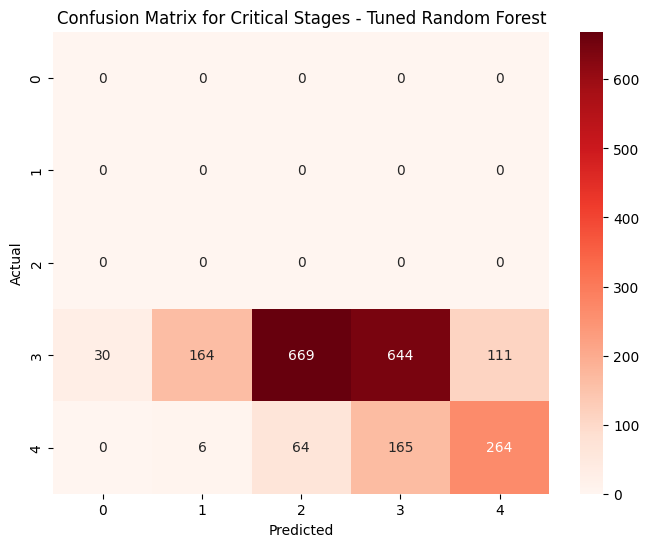


Running Phase 2: Classification Model for Dataset 2 & 4

Degradation Stage Distribution:
Stage 0: 31049 samples (27.00%)
Stage 1: 30540 samples (26.55%)
Stage 2: 29061 samples (25.27%)
Stage 3: 18082 samples (15.72%)
Stage 4: 6276 samples (5.46%)
Using 24 sensor features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

Class distribution in training set:
Stage 0: 21734 samples (27.00%)
Stage 1: 21378 samples (26.55%)
Stage 2: 20343 samples (25.27%)
Stage 3: 12657 samples (15.72%)
Stage 4: 4393 samples (5.46%)

Class distribution in test set:
Stage 0: 9315 samples (27.00%)
Stage 1: 9162 samples (26.55%)
Stage 2: 8718 samples (25.27%)
Stage 3: 5425 samples (15.72%)
Stage 4: 1883 samples (5.46%)

Training classification models...
Applying SMOTE to balance classes...

Class distribution after SMOTE:
Stage 0: 21734 samples (20.00%)
Stage 1: 21734 samples (20.00%)
Stage 2: 21734 samples (20.00%)
Stage 3: 21734 samples (20.00%)
Stage 4: 21734 samples

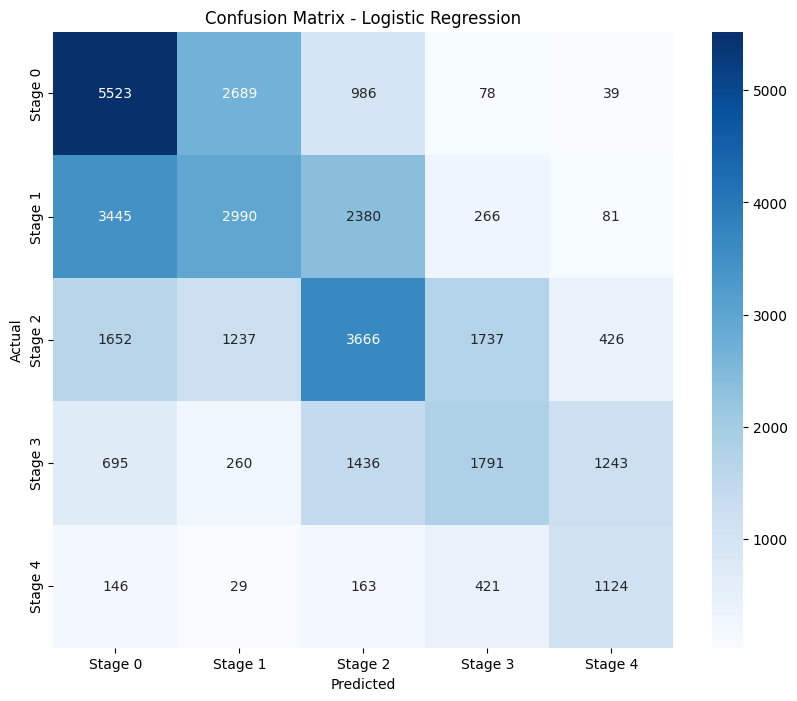


Performance on Critical Stages [3, 4]:
Accuracy: 0.3989
F1 Score: 0.4845


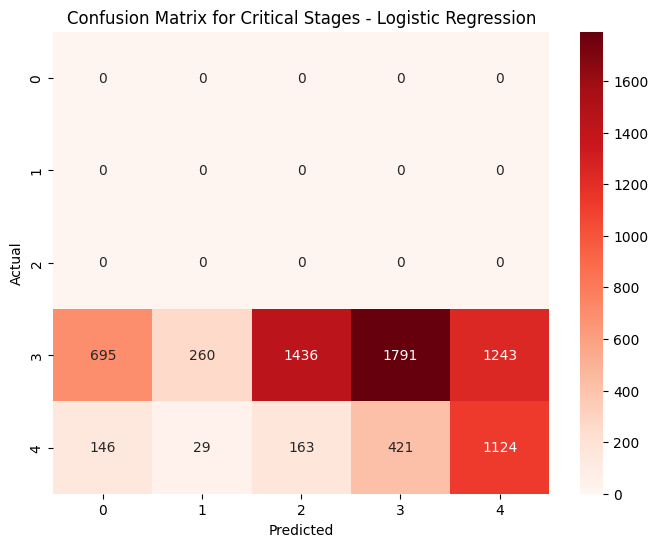


--------------------------------------------------
Training KNN...

KNN Classification Report:
                               precision    recall  f1-score   support

             Stage 0 (Normal)       0.48      0.57      0.52      9315
  Stage 1 (Slightly Degraded)       0.38      0.35      0.36      9162
Stage 2 (Moderately Degraded)       0.44      0.30      0.36      8718
           Stage 3 (Critical)       0.35      0.35      0.35      5425
            Stage 4 (Failure)       0.28      0.52      0.37      1883

                     accuracy                           0.41     34503
                    macro avg       0.39      0.42      0.39     34503
                 weighted avg       0.41      0.41      0.40     34503



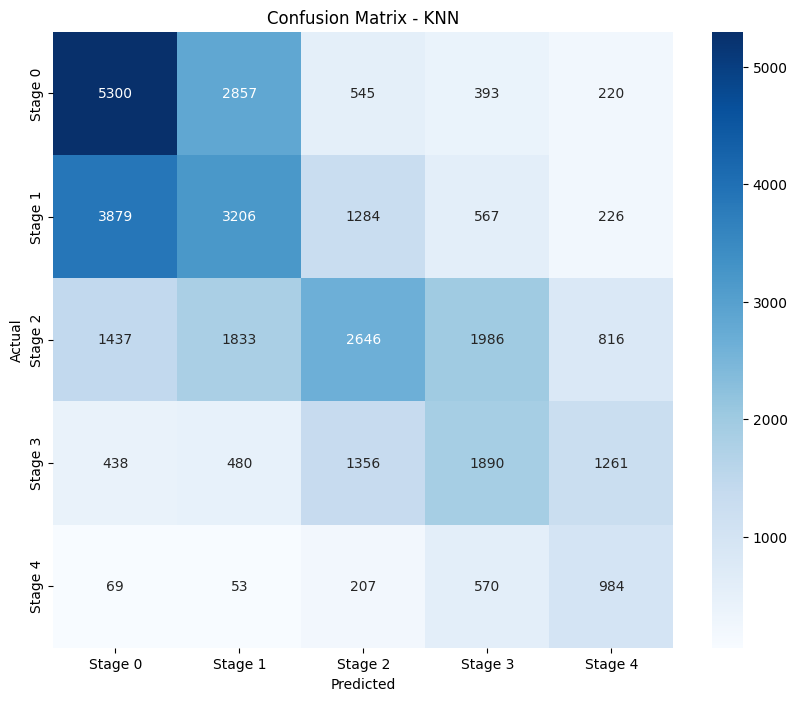


Performance on Critical Stages [3, 4]:
Accuracy: 0.3933
F1 Score: 0.4787


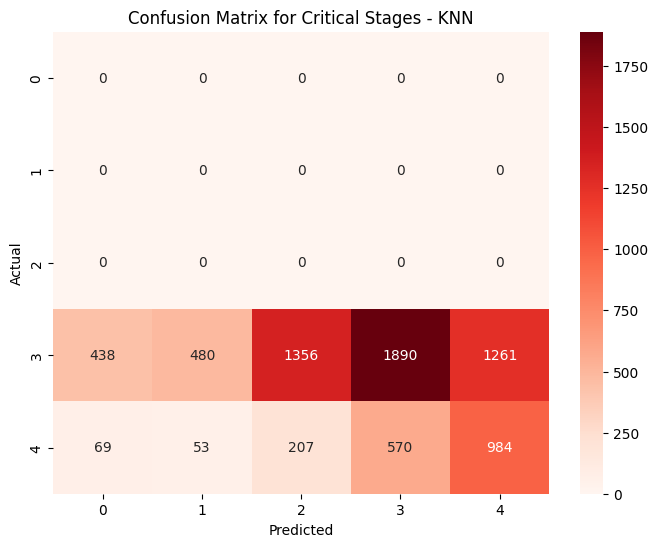


--------------------------------------------------
Training SVM...


In [ ]:
# Run Phase 2 on each dataset with the appropriate cluster-to-stage mapping
# Dataset 1
cluster_to_stage_map_1 = {
    0: 2,
    1: 1,
    2: 4,
    3: 0,
    4: 3
}
results_1 = run_phase2('Dataset 1', df1_cluster_T, cluster_to_stage_map_1)

# Dataset 1 & 3
cluster_to_stage_map_13 = {
    0: 1,
    1: 4,
    2: 3,
    3: 0,
    4: 2
}
results_13 = run_phase2('Dataset 1 & 3', df13_cluster_T, cluster_to_stage_map_13)

# Dataset 2 & 4
cluster_to_stage_map_24 = {
    0: 2,
    1: 4,
    2: 1,
    3: 0,
    4: 3
}
results_24 = run_phase2('Dataset 2 & 4', df24_cluster_T, cluster_to_stage_map_24)

# All Datasets
cluster_to_stage_map_all = {
    0: 3,
    1: 2,
    2: 4,
    3: 1,
    4: 0
}
results_all = run_phase2('All Datasets', df_all_cluster_T, cluster_to_stage_map_all)

# Compare results across datasets
print("\n\nSummary of Best Models Across Datasets:")
print("="*100)
print(f"{'Dataset':<15} {'Best Model':<20} {'Accuracy':<10} {'F1 Score':<10} {'Critical Acc':<12} {'Critical F1':<10}")
print("-"*100)
for dataset_name, results in [
    ('Dataset 1', results_1),
    ('Dataset 1 & 3', results_13),
    ('Dataset 2 & 4', results_24),
    ('All Datasets', results_all)
]:
    print(f"{dataset_name:<15} {results['best_model_name']:<20} {results['accuracy']:.4f} {results['f1_score']:.4f} {results['critical_accuracy'] if results['critical_accuracy'] else 'N/A':<12} {results['critical_f1'] if results['critical_f1'] else 'N/A':<10}")
print("="*100)

In [ ]:
# Choose the best dataset-model combination based on critical F1 score
best_results = None
best_dataset = None
best_critical_f1 = -1

for dataset_name, results in [
    ('Dataset 1', results_1),
    ('Dataset 1 & 3', results_13),
    ('Dataset 2 & 4', results_24),
    ('All Datasets', results_all)
]:
    if results['critical_f1'] and results['critical_f1'] > best_critical_f1:
        best_critical_f1 = results['critical_f1']
        best_results = results
        best_dataset = dataset_name

if best_results:
    print(f"\nOverall best model-dataset combination: {best_results['best_model_name']} on {best_dataset}")
    print(f"Accuracy: {best_results['accuracy']:.4f}")
    print(f"F1 Score: {best_results['f1_score']:.4f}")
    print(f"Critical Stages Accuracy: {best_results['critical_accuracy']:.4f}")
    print(f"Critical Stages F1 Score: {best_results['critical_f1']:.4f}")
    print(f"Best Parameters: {best_results['best_params']}")